# Business Case: Walmart - Confidence Interval and CLT

# About Walmart
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


# Business Problem
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


# Dataset
The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

- User_ID - User ID.
- Product_ID - Product ID.
- Gender - Sex of User
- Age - Age in bins
- Occupation - Occupation(Masked)
- City_Category - Category of the City (A,B,C)
- StayInCurrentCityYears - Number of years stay in current city
- Marital_Status - Marital Status
- ProductCategory - Product Category (Masked)
- Purchase - Purchase Amount



# Problem Statement
- Pre processings
- Describe the values of different Gender
- Describe the values of different categories
- Top 10 userid
- Comparing the mean and median of the Purchase data
- Correlation of the data
- Mean value_counts for the following.
- Outlier detection of purchase
- Removing the outlier values of Purchase
- Boxplot for Purchase after removing outlier
- Pie chart of City_Category
- Pie chart of Gender
- Pie chart of Occupation
- Pie chart of Stay_In_Current_City_Years
- Understanding the distribution of the data for the quantitative attributes:
- Understanding the distribution of data for the categorical variables
- Bivariate Analysis
- Multivariate Analysis
- Which city has highest purchase in age group
- Which Occupation has highest purchase in age group
- Which Stay_In_Current_City_Years has highest purchase in age group
- Which Gender has highest purchase in age group
- Which Marital_Status has highest purchase in age group
- Which Product_Category has highest purchase in age group
- Amount Purchased by unique User_ID
- KDEplot and probplot of Purchase
- Finding Confidence interval of Purchase 
- Average amount spend per customer for Male and Female
- EDA - Bivariate Analysis of Gender
- KDEplot and probplot by Female
- Confidence Interval by Gender(Female)
- Confidence Interval with less sample size
- Confidence Interval with adequate sample size
- Mean, Variance and Standard deviation of Female 
- KDEplot and probplot by Female
- Confidence Interval by Gender(Male)
- Confidence Interval with less sample size
- Confidence Interval with adequate sample size
- Mean, Variance and Standard deviation of Male 
- KDEplot of Male and Female with less sample size
- KDEplot of Male and Female with adequate sample size
- EDA - Bivariate Analysis of Marital_Status
- Amount Purchased by Marital_Status
- Confidence Interval by Marital_Status(Married)
- Mean, Variance and Standard deviation of Married customers
- Confidence Interval by Marital_Status(UnMarried)
- Mean, Variance and Standard deviation of UnMarried customers
- Amount Purchased by Age
- Confidence Interval by Age(0-17)
- Mean, Variance and Standard deviation of Age 0-17 customers
- Confidence Interval by Age(18-25)
- Mean, Variance and Standard deviation of Age 18-25 customers
- Confidence Interval by Age(26-35)
- Mean, Variance and Standard deviation of Age 26-35 customers
- Confidence Interval by Age(36-50)
- Mean, Variance and Standard deviation of Age 36-50 customers
- Confidence Interval by Age(51+)
- Mean, Variance and Standard deviation of Age 51+ customers
- Recommendations

In [68]:
#importing libraries for our purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy import stats
from sklearn.utils import resample

In [69]:
df=pd.read_csv('walmart_data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [70]:
#No of Rows and columns in data
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 550068
Number of columns: 10


In [71]:
#checking datatypes
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [72]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [73]:
#Description of data
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [74]:
#Description of data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,NaN,NaN,NaN,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [75]:
#Description of categorical values in data
df.describe(include='O').T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


In [76]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [77]:
#columns in data
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [78]:
#Shape of data
df.shape

(550068, 10)

In [79]:
# Checking for duplicates
df.duplicated().value_counts()

False    550068
dtype: int64

In [80]:
#checking null values in every column of our data
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [81]:
#Gender value counts in data
df.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [82]:
#Gender value counts in data
df.Gender.value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [83]:
#Marital_Status value counts in data
df.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [84]:
#Marital_Status value counts in data
df.Marital_Status.value_counts(normalize=True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

In [85]:
#Stay_In_Current_City_Years value counts in data
df.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [86]:
#User_ID value counts in data
df.User_ID.value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [87]:
df.User_ID.nunique()

5891

In [88]:
#Product_ID value counts in data
df.Product_ID.value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [89]:
df.Product_ID.nunique()

3631

In [90]:
#City_Category value counts in data
df.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [91]:
df.City_Category.nunique()

3

In [92]:
#Age value counts in data
df.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

## Observations:

### From the above observations, it is derived that,
- There is no missing values in the data.
- There is no duplicated values in the data.
- There are 3631 unique Product id in the dataset.
- Two gender categories in the dataset(M-male,F-female).
- Gender M is the most frequent.
- There are 3 unique city category in the dataset.
- city category B is the most frequent.
- There are 7 unique age categories in the dataset.
- Minimum age of the user is 0-17. 
- Maximum age of the user is 51-55.
- Most of the users are in the age group of 26-35.
- Least no of users are in the age group of 0-17.
- There are 5 unique values in Stay_In_Current_City_Years.
- Top among the Stay_In_Current_City_Years is 1.

# Describe the values of different Gender

In [93]:
df[df['Gender']=='F'].describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,1.358090e+05,135809.000000,135809.000000,135809.000000,135809.000000
mean,1.003130e+06,6.740540,0.419619,5.717714,8734.565765
std,1.786631e+03,6.239639,0.493498,3.696752,4767.233289
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001569e+06,1.000000,0.000000,3.000000,5433.000000
50%,1.003159e+06,4.000000,0.000000,5.000000,7914.000000
75%,1.004765e+06,11.000000,1.000000,8.000000,11400.000000
max,1.006039e+06,20.000000,1.000000,20.000000,23959.000000


In [94]:
df[df['Gender']=='M'].describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,4.142590e+05,414259.00000,414259.000000,414259.000000,414259.00000
mean,1.002996e+06,8.51475,0.406386,5.301512,9437.52604
std,1.706494e+03,6.55379,0.491159,4.006275,5092.18621
min,1.000002e+06,0.00000,0.000000,1.000000,12.00000
25%,1.001505e+06,3.00000,0.000000,1.000000,5863.00000
50%,1.003041e+06,7.00000,0.000000,5.000000,8098.00000
75%,1.004411e+06,15.00000,1.000000,8.000000,12454.00000
max,1.006040e+06,20.00000,1.000000,20.000000,23961.00000


### From the above observations, it is derived that,
- The mean occupation of M(male) is greater than F(female).
- In both male and female the marital status for b
- More than 59% of the users are 0(Single).

# Describe the values of different categories

In [95]:
df[df['City_Category']=='A'].describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,1.477200e+05,147720.000000,147720.000000,147720.000000,147720.000000
mean,1.002942e+06,7.828364,0.382799,5.506275,8911.939216
std,1.791616e+03,6.706808,0.486071,3.848983,4892.115238
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001255e+06,2.000000,0.000000,2.000000,5403.000000
50%,1.002986e+06,6.000000,0.000000,5.000000,7931.000000
75%,1.004508e+06,14.000000,1.000000,8.000000,11786.000000
max,1.006034e+06,20.000000,1.000000,20.000000,23961.000000


In [96]:
df[df['City_Category']=='B'].describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,2.311730e+05,231173.000000,231173.000000,231173.000000,231173.000000
mean,1.003069e+06,7.987282,0.408577,5.376181,9151.300563
std,1.684742e+03,6.500110,0.491572,3.875338,4955.496566
min,1.000004e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001671e+06,2.000000,0.000000,1.000000,5460.000000
50%,1.003129e+06,7.000000,0.000000,5.000000,8005.000000
75%,1.004446e+06,14.000000,1.000000,8.000000,11986.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23960.000000


In [97]:
df[df['City_Category']=='C'].describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,1.711750e+05,171175.000000,171175.000000,171175.000000,171175.000000
mean,1.003050e+06,8.411789,0.434281,5.354176,9719.920993
std,1.725825e+03,6.376797,0.495664,4.087740,5189.465121
min,1.000002e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001561e+06,3.000000,0.000000,1.000000,6031.500000
50%,1.003119e+06,7.000000,0.000000,5.000000,8585.000000
75%,1.004503e+06,14.000000,1.000000,8.000000,13197.000000
max,1.006038e+06,20.000000,1.000000,20.000000,23961.000000


### From the above observations, it is derived that,
- city category B has the most frequent purchase count.
- city category A has the least frequent purchase count.


# Top 10 userid

In [250]:
labels = df['User_ID'].value_counts().head(10).to_frame("count")
labels

,count
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823
1003618,767
1001150,752
1001015,740
1005795,729
1005831,727


# Comparing the mean and median of the Purchase data

In [98]:
print("Purchase",':',df["Purchase"].mean())

Purchase : 9263.968712959126


In [99]:
print("Purchase",':',df["Purchase"].median())

Purchase : 8047.0


### From the above, it is derived that,
- The mean and median of the Purchase data is not similar


In [100]:
# Making a copy of our dataset
df1=df.copy()
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [101]:
#removing "+" from data and converting the data type as int
df1['Stay_In_Current_City_Years']=df1['Stay_In_Current_City_Years'].str.replace("+","").astype('int64')
df1

C:\Users\SIYAVUDEEN\AppData\Local\Temp\ipykernel_21952\3881682091.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Stay_In_Current_City_Years']=df1['Stay_In_Current_City_Years'].str.replace("+","").astype('int64')


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [102]:
df1.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

# Correlation of the data

In [219]:
df1.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,-0.030737,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.030005,0.024280,-0.007618,0.020833
Stay_In_Current_City_Years,-0.030737,0.030005,1.000000,-0.012819,-0.004213,0.005422
Marital_Status,0.020443,0.024280,-0.012819,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,-0.004213,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,1.000000


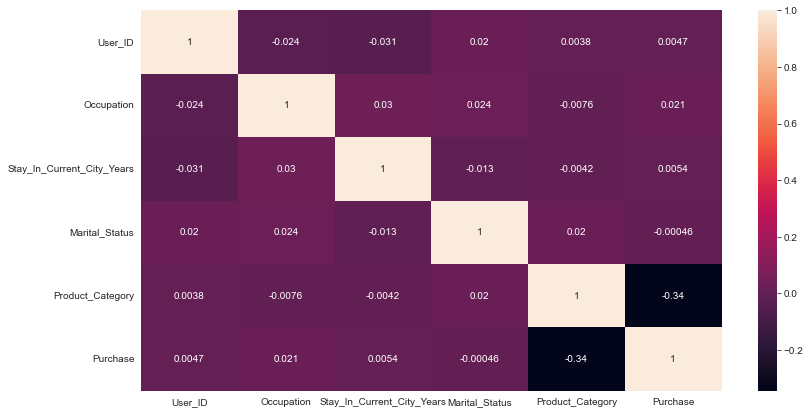

In [223]:
plt.figure(figsize=(13,7))
sns.heatmap(df1.corr(), annot=True)
plt.show()

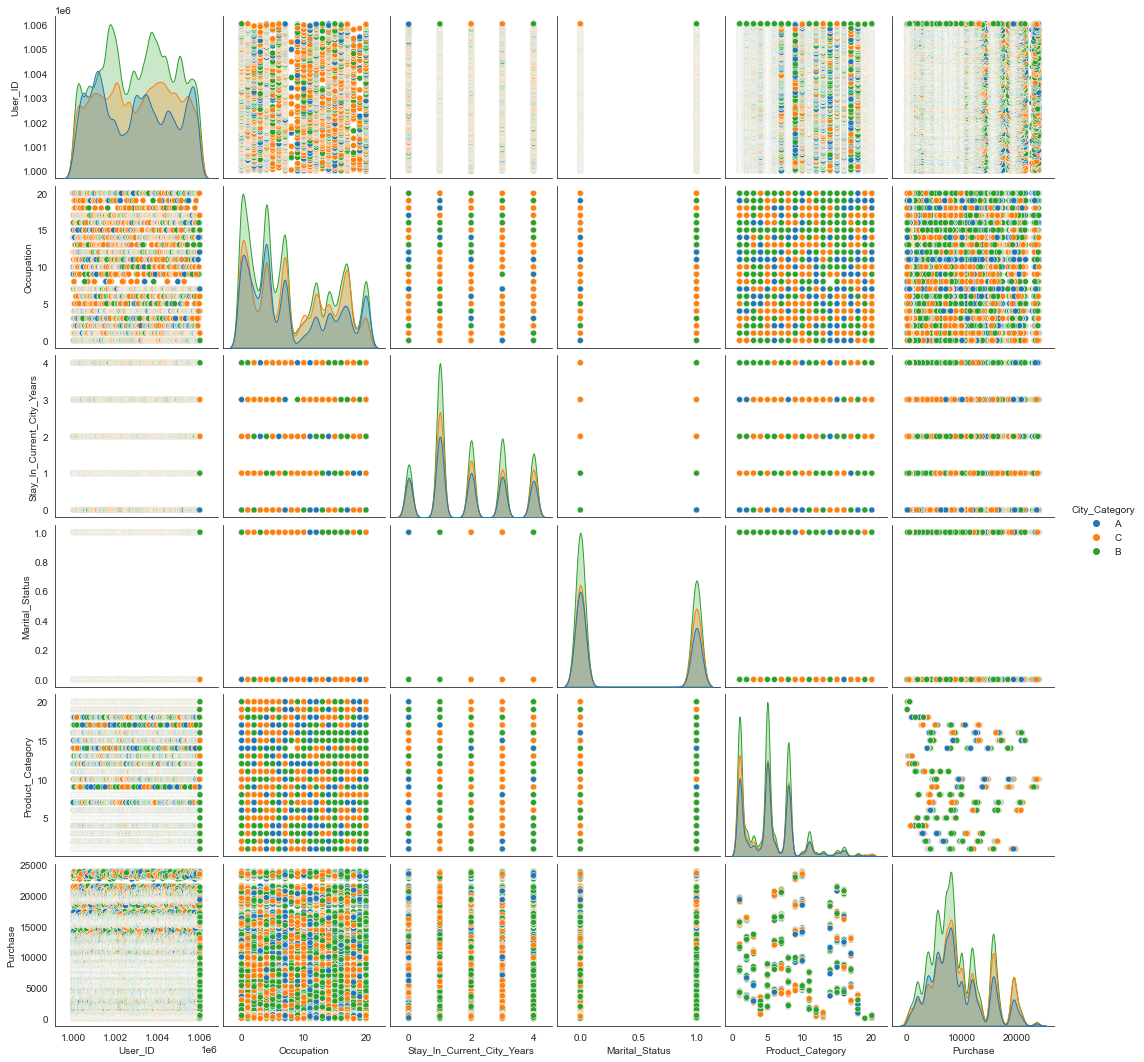

In [237]:
sns.pairplot(data=df1, hue='City_Category')
plt.show()

# Mean value_counts for the following.
- Gender
- Age
- Occupation
- City_Category
- Stay_In_Current_City_Years
- Marital_Status
- Product_Category

In [103]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Product_Category           1      0.255201
                           2      0.043384
                           3      0.036746
                           4      0.021366
                           5      0.274390
                           6      0.037206
                           7      0.006765
                           8      0.207111
                           9      0.000745
                           10     0.009317
                           11     0.044153
                           12     0.007175
                           13     0.010088
                           14     0.002769
                           15     0.011435
                           16     0.017867
                           17     0.001051
                           18     0.005681
                           19     0.002914
                           20     0.004636
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

# Observations
- 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45).
- 75% of the users are Male and 25% are Female.
- 60% Single, 40% Married.
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years.
- Total of 20 product categories are there.
- There are 21 differnent types of occupations in the city.
- Category B is the most frequent.

# Univariate Analysis

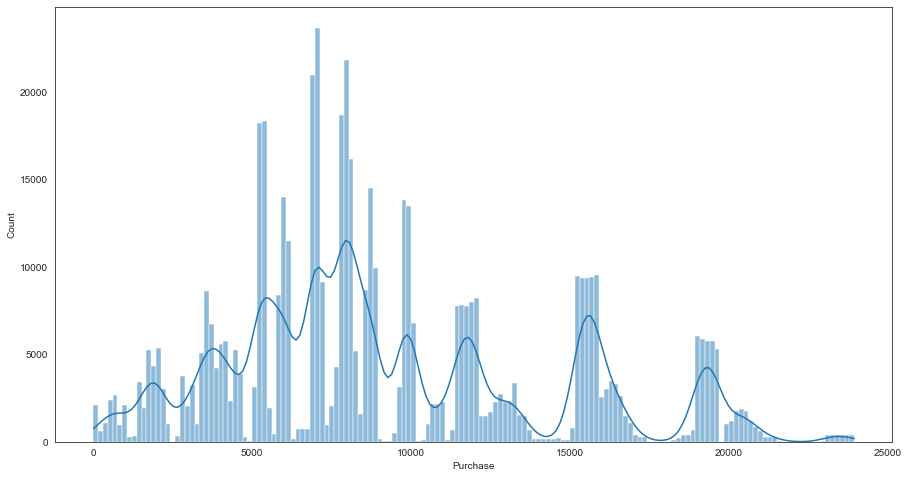

In [104]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

### From the above plot, it is derived that,
- Most of the high level plots are in between 5000 to 10000

# Outlier detection of purchase

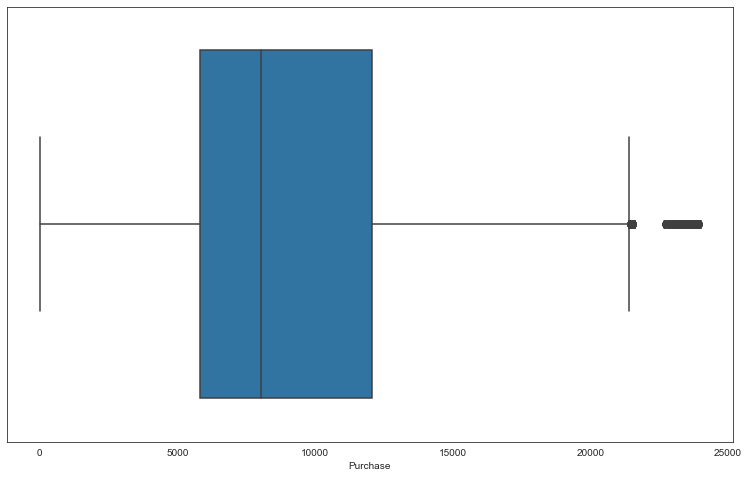

In [105]:
plt.figure(figsize=(13, 8))
sns.boxplot(data=df, x='Purchase')
plt.show()

### From the above plot, it is derived that the outlier detection of Purchase.
- Purchase is having outliers.
- Most of the customers are in the 6000-1200 range with a right-skewed distribution for purchase.

# Removing the outlier values of Purchase

In [106]:
q1=df['Purchase'].quantile(.25)
q2=df['Purchase'].median()
q3=df['Purchase'].quantile(.75)
iqr=q3-q1 
df_in=df[(df['Purchase']>q1-1.5*iqr)&(df['Purchase']<q3+1.5*iqr)]
df_in.shape

(547391, 10)

In [107]:
q2

8047.0

In [108]:
df_in

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [109]:
df.shape

(550068, 10)

- After outlier removal of Purchase, 2677 rows are deleted

## Boxplot for Purchase after removing outlier

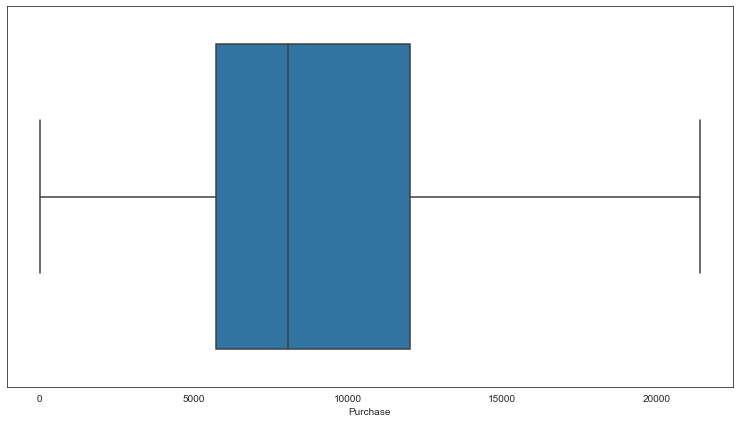

In [110]:
plt.figure(figsize=(13,7))
sns.boxplot(data = df_in, x = 'Purchase')
plt.show()

### From the above plot, it is derived that the outlier detection of Purchase.
- In the boxplot, we can clearly see that most of the outliers are removed.

# Pie chart of City_Category

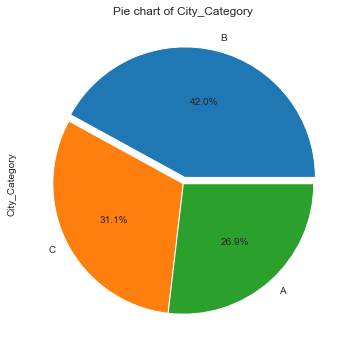

In [111]:
plt.figure(figsize=(8, 6))
df['City_Category'].value_counts().plot.pie(autopct='%1.1f%%',explode=(.05,0,0))
plt.title("Pie chart of City_Category")
plt.show()

### From the above plot, it is derived that the distribution of City_Category.
- Here most of the datas are coming under category B(42% of the data).

# Pie chart of Gender

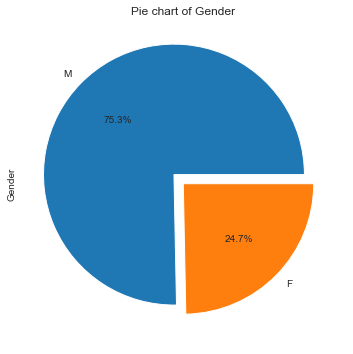

In [112]:
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%',explode=(.1,0))
plt.title("Pie chart of Gender")
plt.show()

### From the above plot, it is derived that the distribution of Gender.
- Here most of the customers are Male(More than 75%).

# Pie chart of Age groups

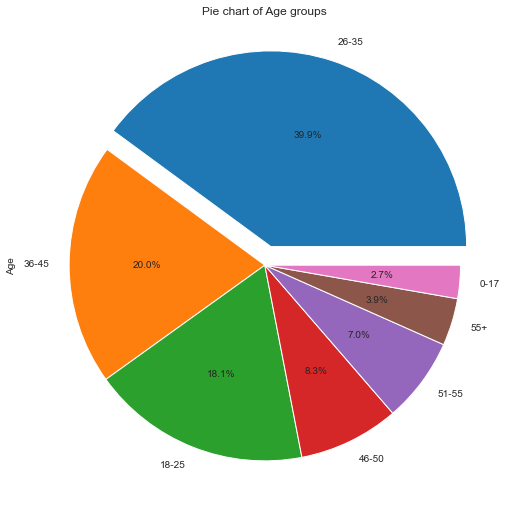

In [113]:
plt.figure(figsize=(11, 9))
df['Age'].value_counts().plot.pie(autopct='%1.1f%%',explode=(.1,0,0,0,0,0,0))
plt.title("Pie chart of Age groups")
plt.show()

### From the above plot, it is derived that the distribution of Age groups.
- Here most of the customers are in the age group of 26-35(around 40%).

# Pie chart of Occupation

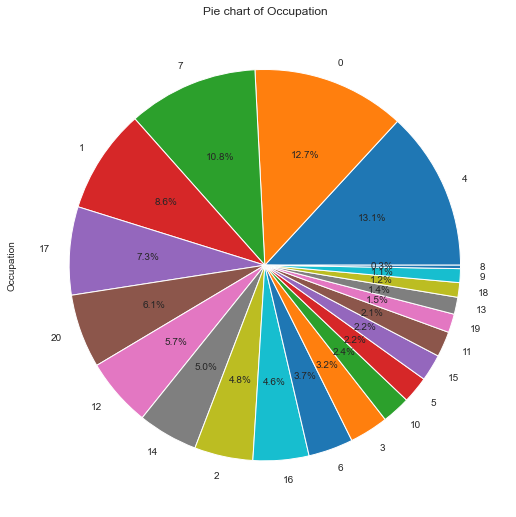

In [114]:
plt.figure(figsize=(11, 9))
df['Occupation'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Pie chart of Occupation")
plt.show()

### From the above plot, it is derived that the distribution of Occupation.
- Here highest no of customers are in category 4.

# Pie chart of Stay_In_Current_City_Years

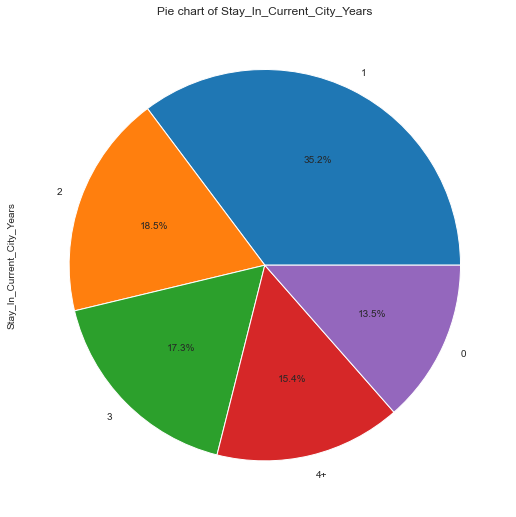

In [115]:
plt.figure(figsize=(11, 9))
df['Stay_In_Current_City_Years'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Pie chart of Stay_In_Current_City_Years")
plt.show()

### From the above plot, it is derived that the distribution of Stay_In_Current_City_Years.
- Here highest no of customers are coming under 1year.

# Understanding the distribution of the data for the quantitative attributes:

- Occupation
- Stay_In_Current_City_Years
- Marital_Status
- Product_Category
- Purchase

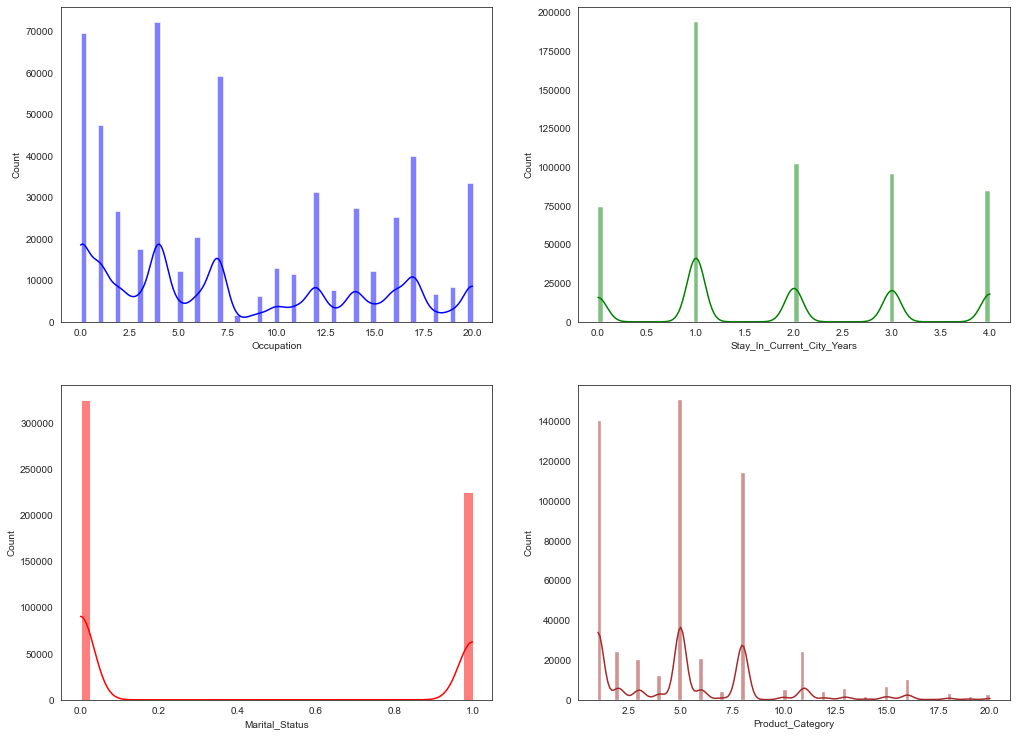

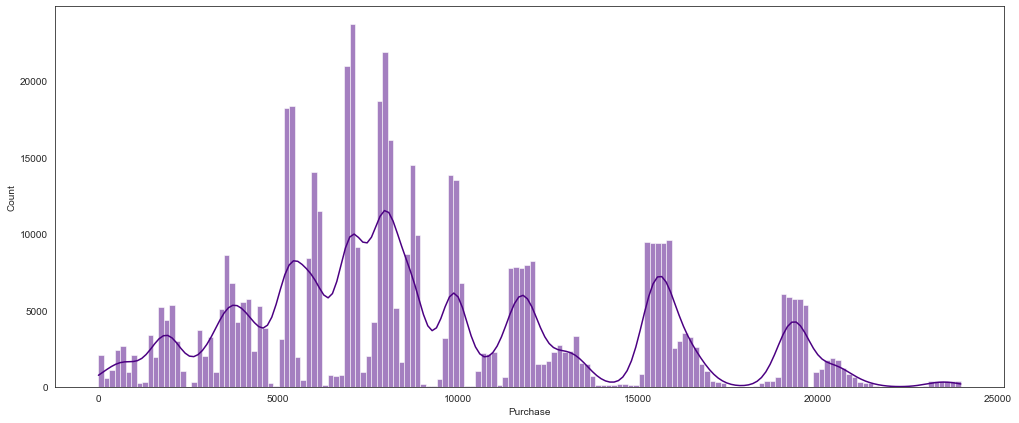

In [238]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(17, 7))
fig.subplots_adjust(top=1.5)
sns.histplot(data=df1, x="Occupation", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=df1, x="Stay_In_Current_City_Years", kde=True,color="green", ax=axis[0,1])
sns.histplot(data=df1, x="Marital_Status", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=df1, x="Product_Category", kde=True,color="brown", ax=axis[1,1])
plt.show()
plt.figure(figsize=(17, 7))
sns.histplot(data=df1, x="Purchase", kde=True,color="indigo")
plt.show()

### From the above plot, it is derived that,
- Most of the customers from product category 1,5,8 and 11.
- More no of custers from stay in current city years 1.
- Singles is higher than married.
- Most of the purchase values are between 5000-10000.

## Understanding the distribution of data for the categorical variables
- Gender
- Age
- Occupation
- City_Category
- Stay_In_Current_City_Years
- Marital_Status
- Product_Category

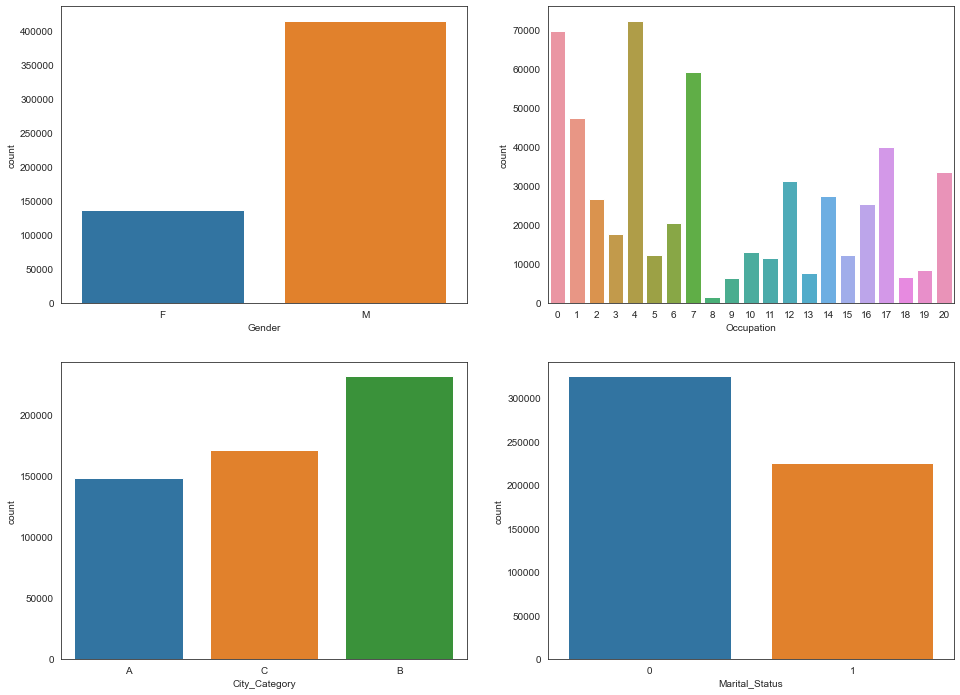

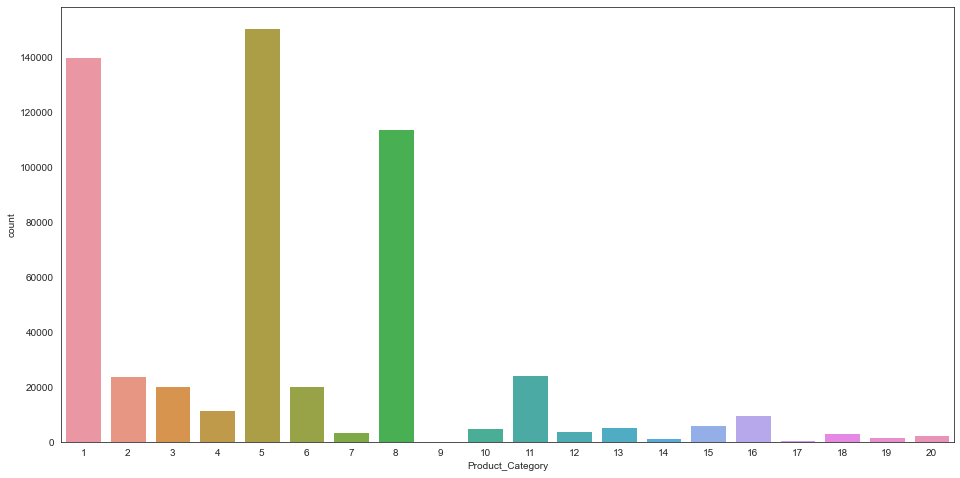

In [116]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='Product_Category')
plt.show()

### From the above plot, it is derived that,
- Most of the users are Male..
- There are 20 different types of Occupation and Product_Category.
- More users belong to B City_Category.
- More users are Single as compare to Married.
- Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

# Bivariate Analysis

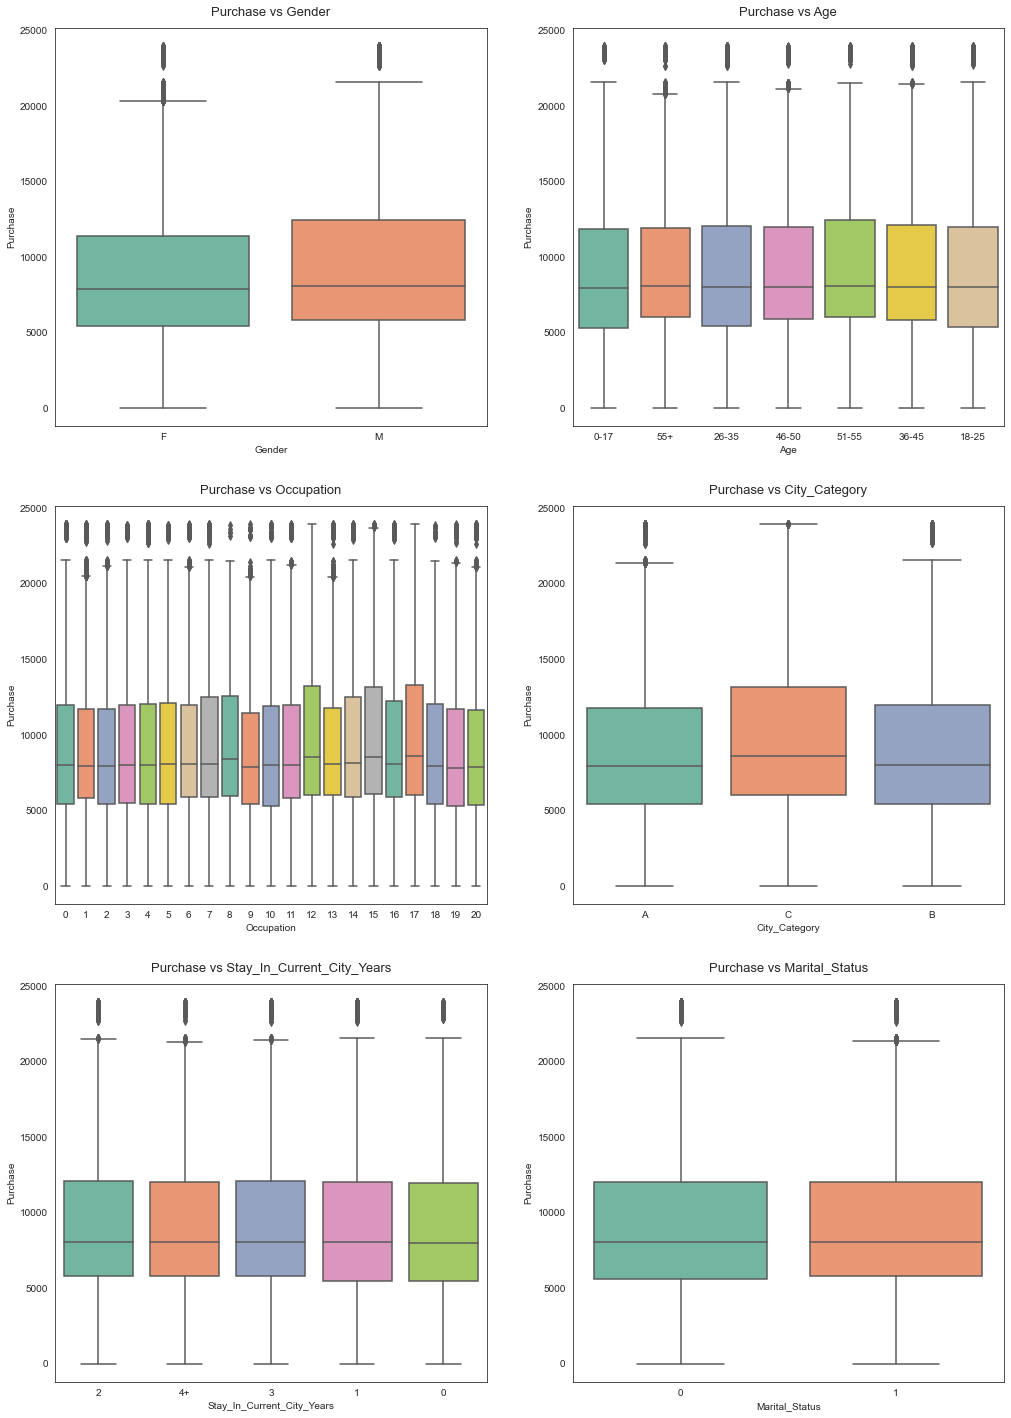

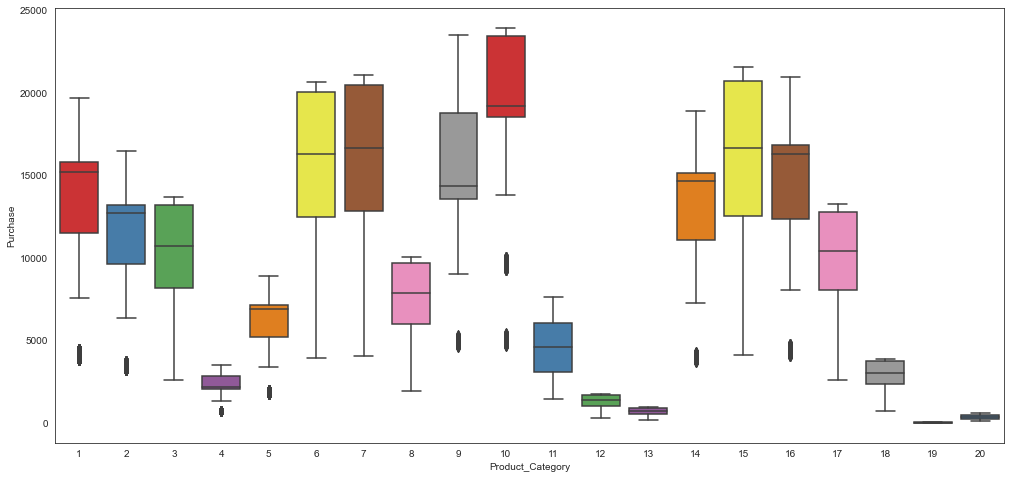

In [117]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(17, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set2')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()
plt.figure(figsize=(17, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set1')
plt.show()

### From the above plot, it is derived that,
- The above boxplots are clearly shows about Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category.


# Multivariate Analysis

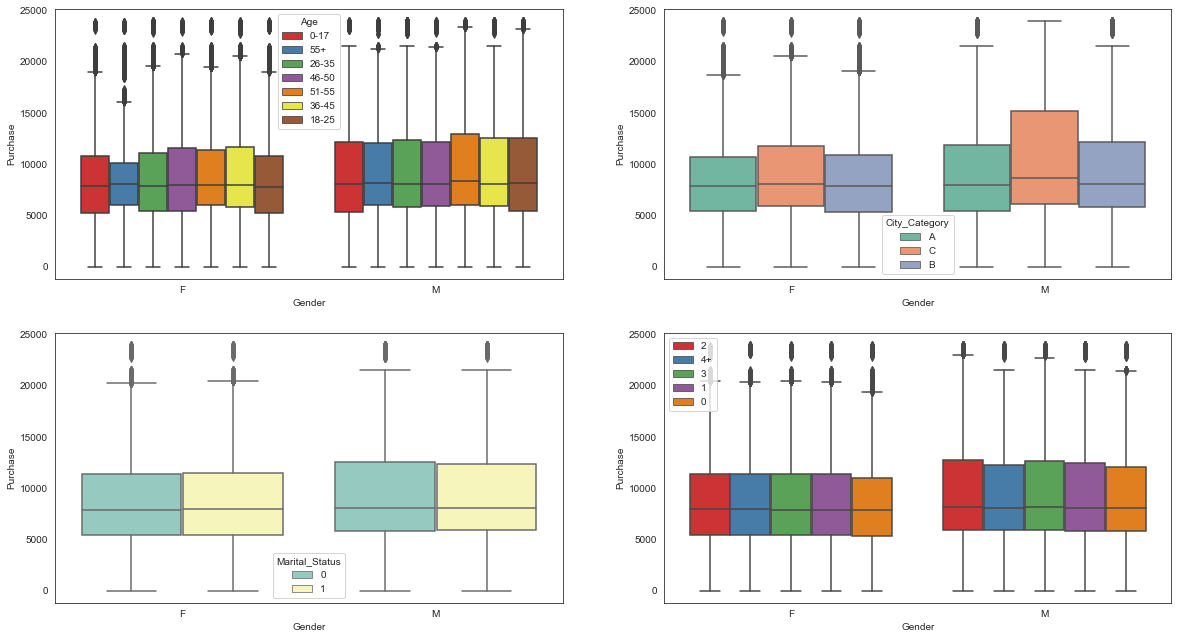

In [118]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set1', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set2', ax=axs[0,1])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set1', ax=axs[1,1])
axs[1,1].legend(loc='upper left')
plt.show()

### From the above plot, it is derived that,
- How the datas of Age, City_Category, Marital_Status and Stay_In_Current_City_Years are related with the purchase data 

# Which city has highest purchase in age group

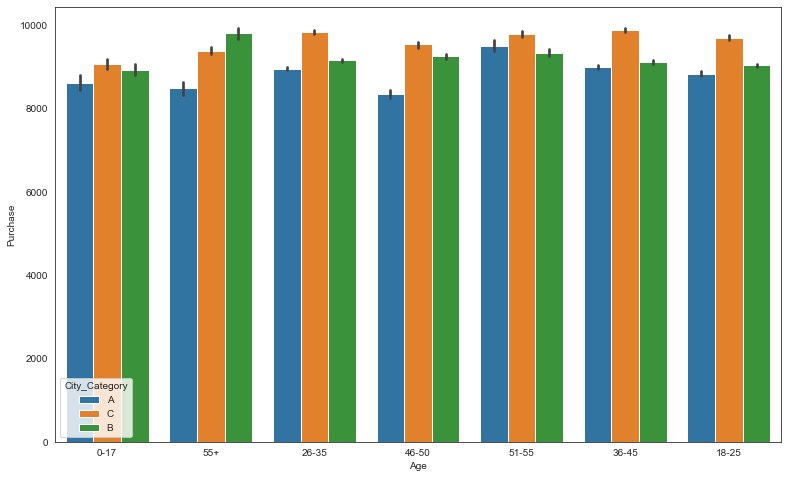

In [254]:
plt.figure(figsize=(13,8))
sns.barplot(x='Age',  y='Purchase',hue='City_Category',  data=df)
plt.show()

### From the above plot, it is derived that,
- City category C has the highest amount of purchase value.

# Which Occupation has highest purchase in age group

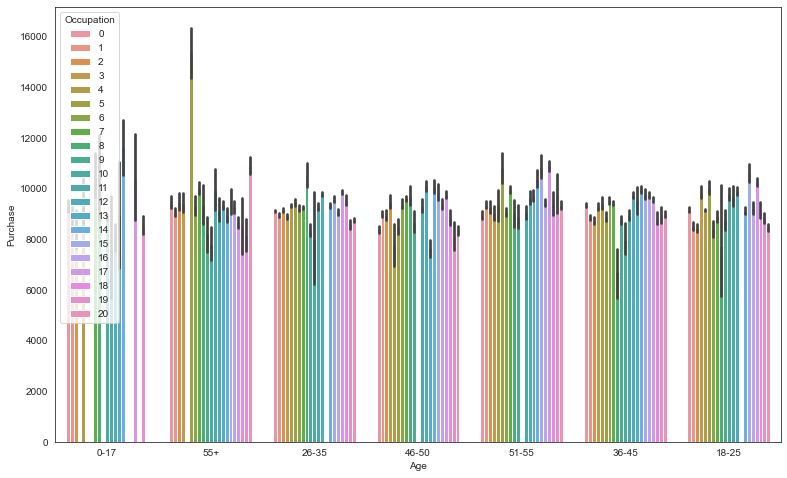

In [255]:
plt.figure(figsize=(13,8))
sns.barplot(x='Age',  y='Purchase',hue='Occupation',  data=df)
plt.show()

### From the above plot, it is derived that,
- in Age group 55+ most of the customers are in occupation 4.

# Which Stay_In_Current_City_Years has highest purchase in age group

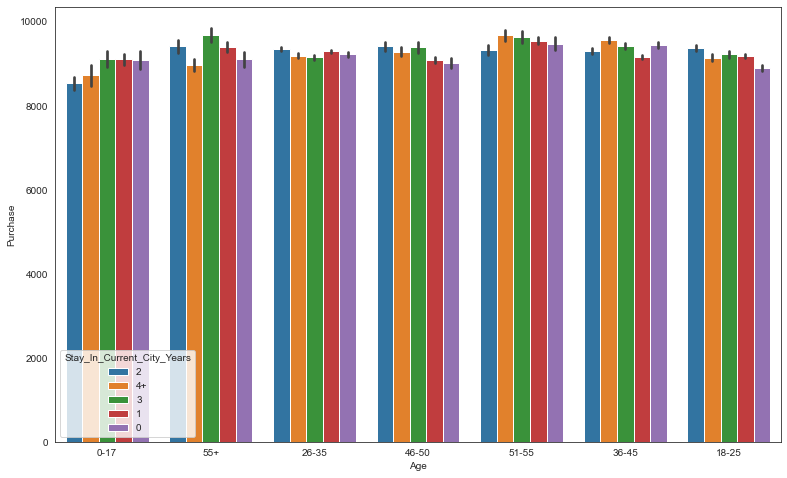

In [258]:
plt.figure(figsize=(13,8))
sns.barplot(x='Age',  y='Purchase',hue='Stay_In_Current_City_Years',  data=df)
plt.show()

### From the above plot, it is derived that,
- In stay in current city category 3 has slightly higher than others.

# Which Gender has highest purchase in age group

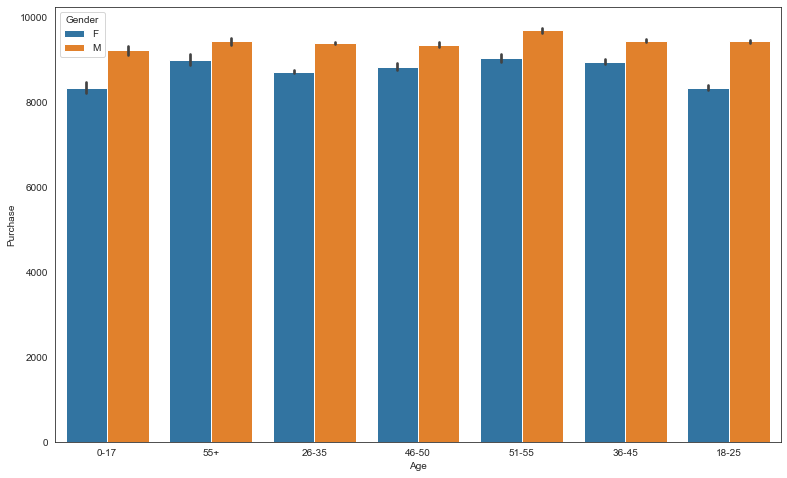

In [257]:
plt.figure(figsize=(13,8))
sns.barplot(x='Age',  y='Purchase',hue='Gender',  data=df)
plt.show()

### From the above plot, it is derived that,
- In all Age categories Male has the highest amount of purchase value.

# Which Marital_Status has highest purchase in age group

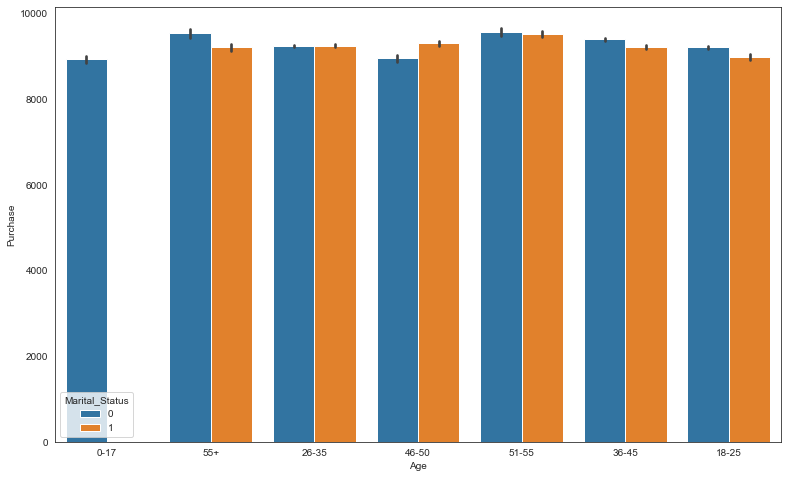

In [259]:
plt.figure(figsize=(13,8))
sns.barplot(x='Age',  y='Purchase',hue='Marital_Status',  data=df)
plt.show()

### From the above plot, it is derived that,
- In all Age categories Unmarried has the highest amount of purchase value.

# Which Product_Category has highest purchase in age group

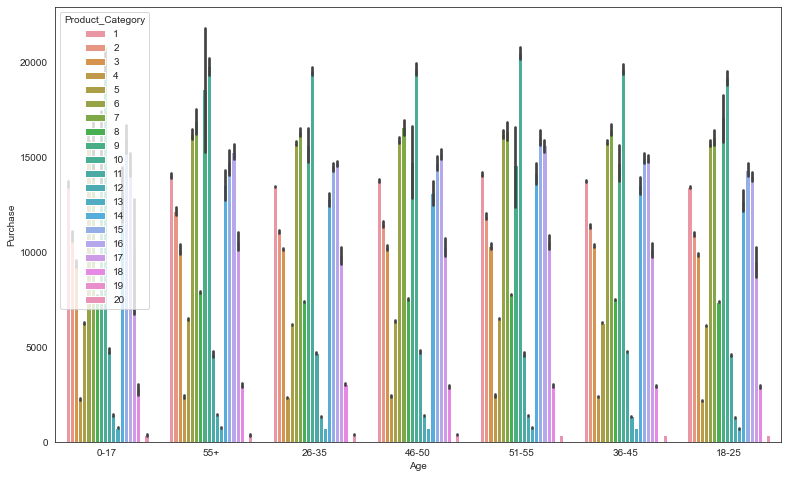

In [260]:
plt.figure(figsize=(13,8))
sns.barplot(x='Age',  y='Purchase',hue='Product_Category',  data=df)
plt.show()

### From the above plot, it is derived that,
- In all Age categories Product category 8 has the highest amount of purchase value.

# Amount Purchased by unique User_ID

In [119]:
amt_dfPurchase = df.groupby(['User_ID'])[['Purchase']].sum()
amt_dfPurchase = amt_dfPurchase.reset_index()
amt_dfPurchase

,User_ID,Purchase
0,1000001,334093
1,1000002,810472
2,1000003,341635
3,1000004,206468
4,1000005,821001
...,...,...
5886,1006036,4116058
5887,1006037,1119538
5888,1006038,90034
5889,1006039,590319


# KDEplot and probplot of Purchase

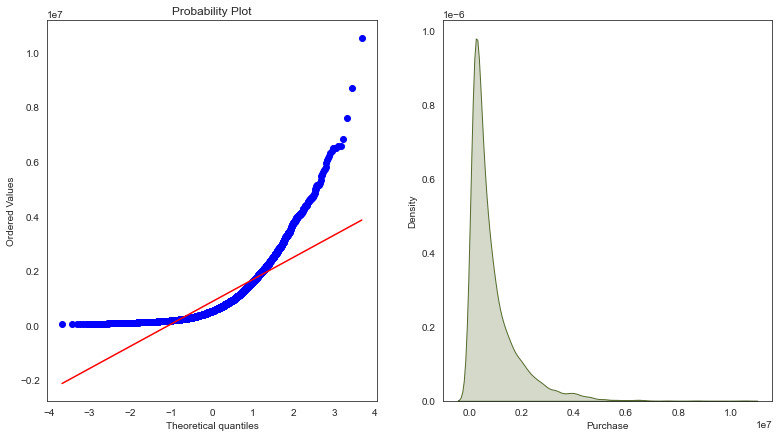

In [120]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(amt_dfPurchase["Purchase"],dist='norm',plot=ax[0])
sns.kdeplot(amt_dfPurchase["Purchase"],fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above, derived that,
- The above probplot and kdeplot shows that it not in the form of normal distribution.

# Finding Confidence interval of Purchase 

In [221]:
n_iteration=10000
bootstrap_means1=[]
sample_size=10000
for i in range(n_iteration):
    s=resample(amt_dfPurchase['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means1.append(m)
confidence=0.90
lower,upper=np.percentile(bootstrap_means1,[5,95])
print(lower)
print(upper)

849774.9091149999
880736.8532349999


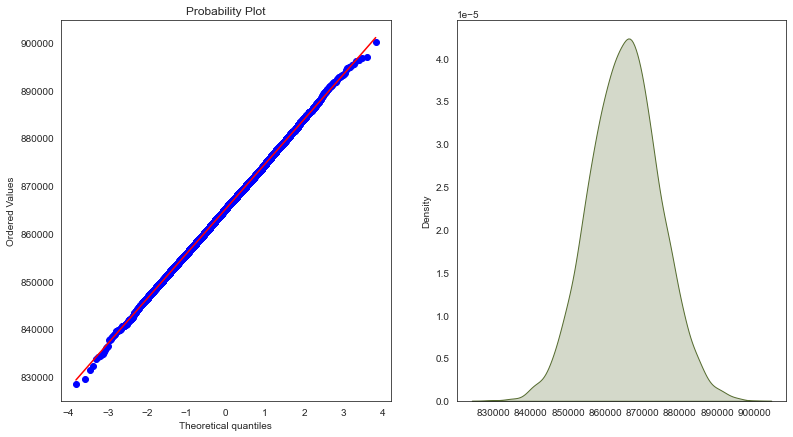

In [222]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(bootstrap_means1,dist='norm',plot=ax[0])
sns.kdeplot(bootstrap_means1,fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above, it is derived that,
- Confidence intervel of Purchase data for 90 percentile is 849774.9091149999 - 880736.8532349999

In [124]:
mean=np.mean(bootstrap_means1)
Variance=np.var(bootstrap_means1)
standard=np.std(bootstrap_means1)
print("mean=",mean)
print("Variance=",Variance)
print("standard=",standard)

mean= 864949.01816931
Variance= 89607727.37835696
standard= 9466.135820827682


### Using the central limit theorem of population,
- Average amount spend by customers is 864949.01816931
- Variance amount spend by customers is 89607727.37835696
- standard amount spend by customers is 9466.135820827682

# Average amount spend per customer for Male and Female

In [125]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [126]:
# Gender wise value counts in avg_amt_df
amt_df['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [127]:
#average amount spend for each customer - Male & Female
dfmaleh=amt_df[amt_df['Gender']=='M']['Purchase'].to_frame("Purchase")
dfmaleh

,Purchase
1,810472
2,341635
3,206468
4,821001
6,234668
...,...
5880,737361
5882,517261
5883,501843
5884,197086


<AxesSubplot:xlabel='Purchase', ylabel='Count'>

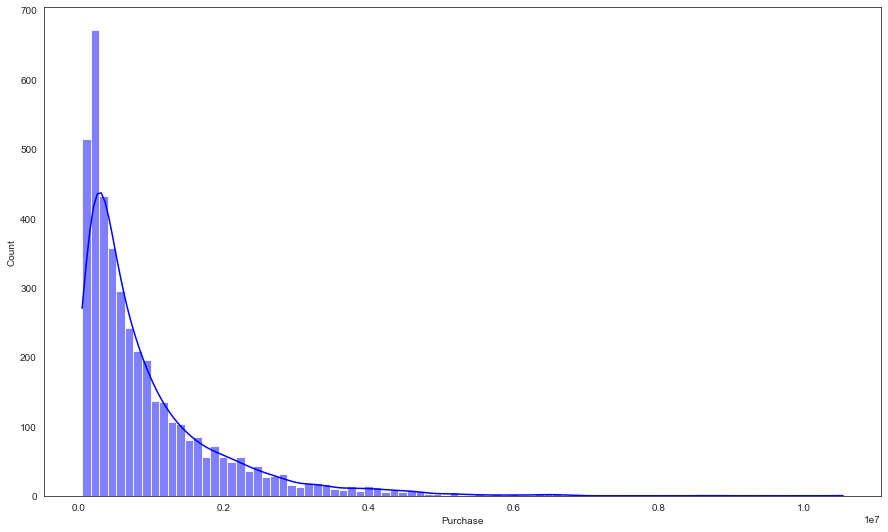

In [128]:
plt.figure(figsize=(15, 9))
sns.histplot(data=dfmaleh, x="Purchase", kde=True,color="blue")

In [129]:
dffemaleh=amt_df[amt_df['Gender']=='F']['Purchase'].to_frame("Purchase")
dffemaleh

,Purchase
0,334093
5,379930
9,2169510
10,557023
15,150490
...,...
5885,956645
5886,4116058
5887,1119538
5888,90034


<AxesSubplot:xlabel='Purchase', ylabel='Count'>

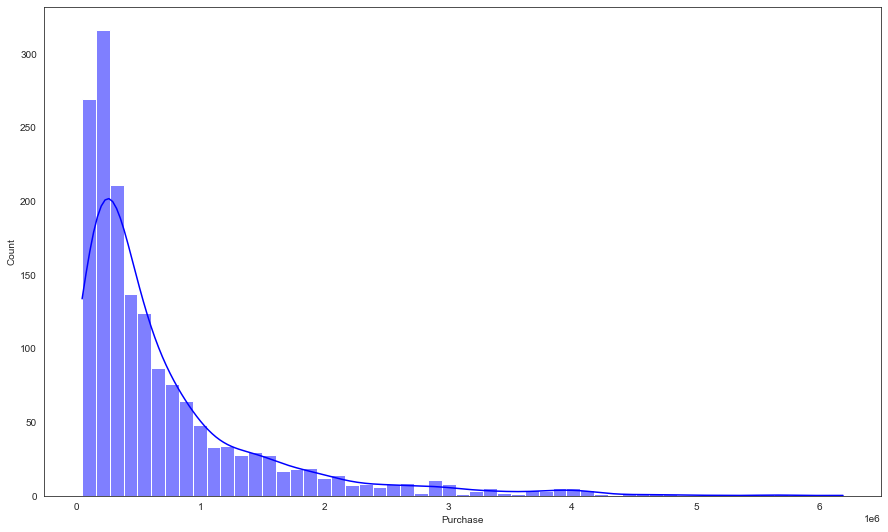

In [130]:
plt.figure(figsize=(15, 9))
sns.histplot(data=dffemaleh, x="Purchase", kde=True,color="blue")

In [131]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()
print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


### From the above plot, it is derived that,
- Male customers spend more money than female customers

# EDA - Bivariate Analysis of Gender

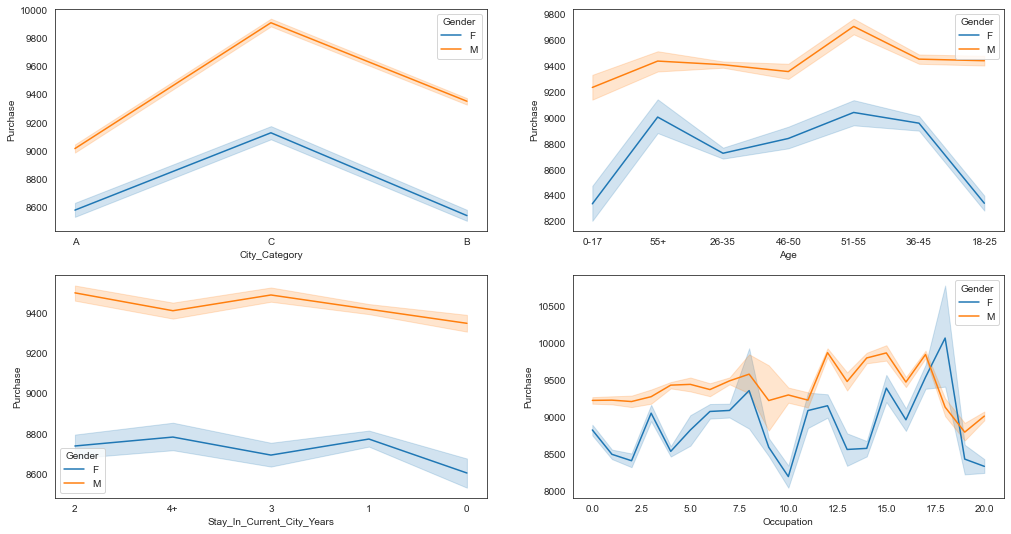

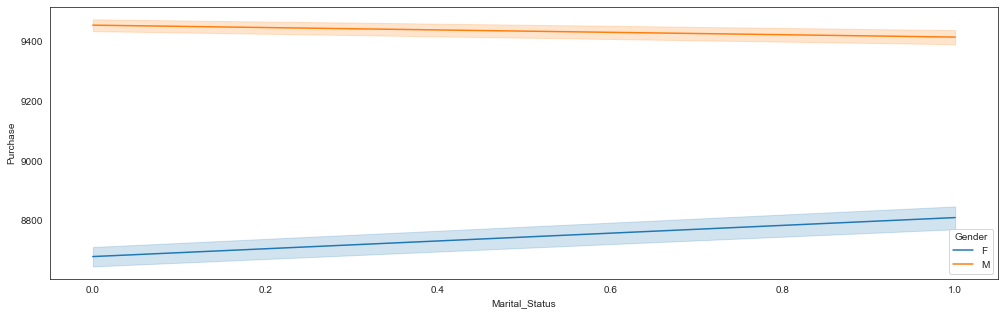

In [132]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(17,9))
sns.lineplot(data=df, x='City_Category', y='Purchase', hue="Gender",ax=ax[0,0])
sns.lineplot(data=df, x='Age', y='Purchase', hue="Gender",ax=ax[0,1])
sns.lineplot(data=df, x='Stay_In_Current_City_Years', y='Purchase', hue="Gender",ax=ax[1,0])
sns.lineplot(data=df, x='Occupation', y='Purchase', hue="Gender",ax=ax[1,1])
plt.show()
plt.figure(figsize=(17, 5))
sns.lineplot(data=df, x='Marital_Status', y='Purchase', hue="Gender")
plt.show()

### From the above plot, it is derived that,
- Male customers spend more money than female customers.
- City category C spend more money than others.
- Age category greater than 50 spends more money than others.

# KDEplot and probplot by Female

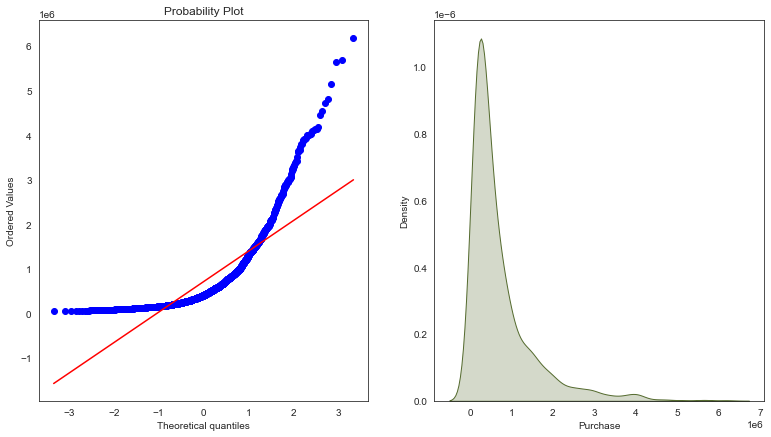

In [133]:
dff=amt_df[amt_df['Gender']=='F']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(dff["Purchase"],dist='norm',plot=ax[0])
sns.kdeplot(dff["Purchase"],fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it is derived that,
- The above plots doesnt follow the normal distribution.

# Confidence Interval by Gender(Female)

In [134]:
dff=amt_df[amt_df['Gender']=='F']
dff

,User_ID,Gender,Purchase
0,1000001,F,334093
5,1000006,F,379930
9,1000010,F,2169510
10,1000011,F,557023
15,1000016,F,150490
...,...,...,...
5885,1006035,F,956645
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034


# Confidence Interval with less sample size

In [135]:
n_iteration=1000
bootstrap_meansfemaleL=[]
sample_size=100
for i in range(n_iteration):
    s=resample(dff['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meansfemaleL.append(m)
confidence=0.90
lower,upper=np.percentile(bootstrap_meansfemaleL,[5,95])
print('lower=',lower)
print('upper=',upper)

lower= 580480.7390000001
upper= 846909.0115


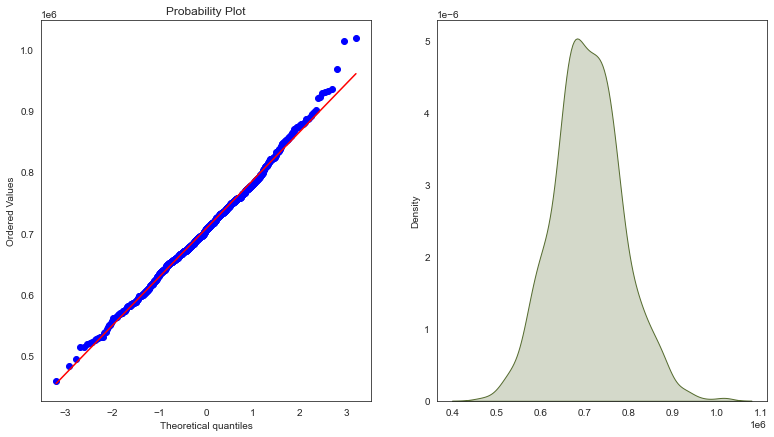

In [136]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(bootstrap_meansfemaleL,dist='norm',plot=ax[0])
sns.kdeplot(bootstrap_meansfemaleL,fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it can infer about the population that, 90% of the times with less sample size,
- Average amount spend by female customer will lie in between: (580480.7390000001, 846909.0115)

# Confidence Interval with adequate sample size

In [137]:
n_iteration=10000
bootstrap_meansfemale=[]
sample_size=10000
for i in range(n_iteration):
    s=resample(dff['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meansfemale.append(m)
confidence=0.90
lower,upper=np.percentile(bootstrap_meansfemale,[2.5,95.75])
print("lower=",lower)
print("upper=",upper)

lower= 696550.6583049999
upper= 726275.5632007499


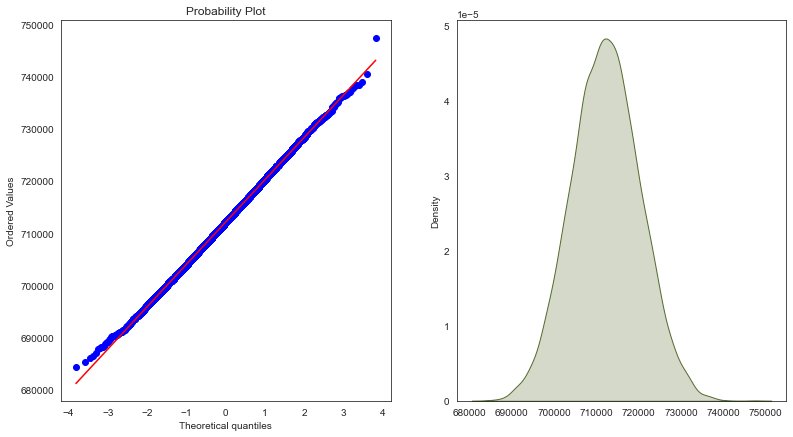

In [138]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(bootstrap_meansfemale,dist='norm',plot=ax[0])
sns.kdeplot(bootstrap_meansfemale,fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it can infer about the population that, 90% of the times with adequate sample size,
- Average amount spend by female customer will lie in between: (696071.9139725, 725555.989315)

# Mean, Variance and Standard deviation of Female 

In [139]:
mean=np.mean(bootstrap_meansfemale)
Variance=np.var(bootstrap_meansfemale)
standard=np.std(bootstrap_meansfemale)
print("mean=",mean)
print("Variance=",Variance)
print("standard=",standard)

mean= 712177.5731223
Variance= 65847750.28459313
standard= 8114.662672261437


### Using the central limit theorem of population,
- Average amount spend by female customers is 712177.5731223
- Variance amount spend by female customers is 65847750.28459313
- standard amount spend by female customers is 8114.662672261437

# KDEplot and probplot by Female

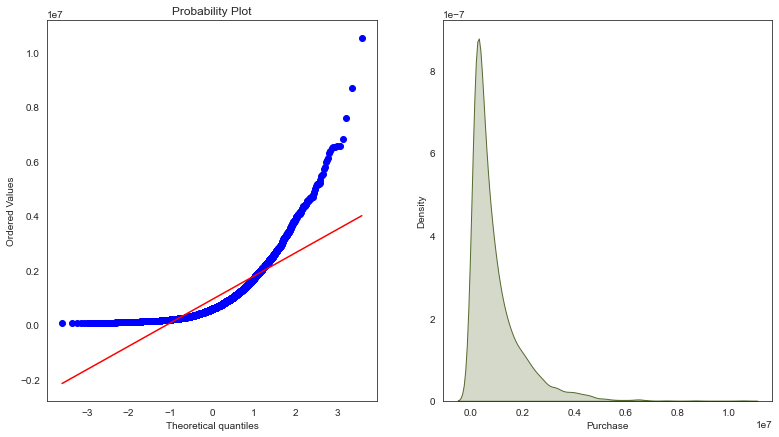

In [140]:
dfm=amt_df[amt_df['Gender']=='M']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(dfm["Purchase"],dist='norm',plot=ax[0])
sns.kdeplot(dfm["Purchase"],fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it is derived that,
- The above plots doesnt follow the normal distribution.

# Confidence Interval by Gender(Male)

In [141]:
dfm=amt_df[amt_df['Gender']=='M']
dfm

,User_ID,Gender,Purchase
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
6,1000007,M,234668
...,...,...,...
5880,1006030,M,737361
5882,1006032,M,517261
5883,1006033,M,501843
5884,1006034,M,197086


## Confidence Interval with less sample size

In [142]:
n_iteration=1000
bootstrap_meansmaleL=[]
sample_size=100
for i in range(n_iteration):
    s=resample(dfm['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meansmaleL.append(m)
confidence=0.90
lower,upper=np.percentile(bootstrap_meansmaleL,[5,95])
print(lower)
print(upper)

774412.7825
1082215.76


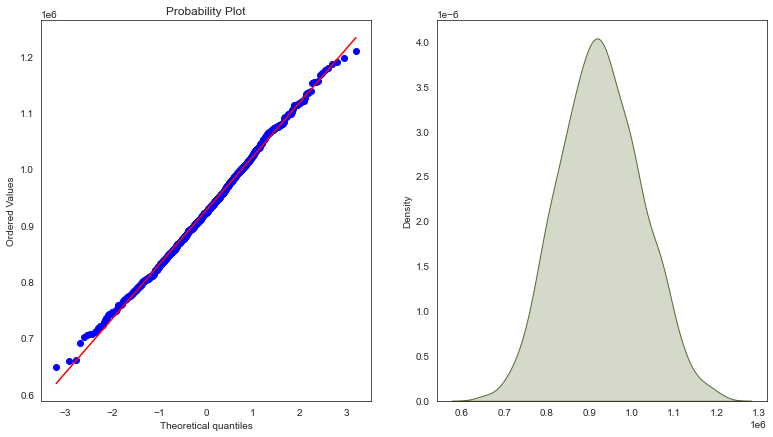

In [143]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(bootstrap_meansmaleL,dist='norm',plot=ax[0])
sns.kdeplot(bootstrap_meansmaleL,fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it can infer about the population that, 90% of the times with less sample size,
- Average amount spend by male customer will lie in between: (774412.7825,1082215.76)

## Confidence Interval with adequate sample size

In [144]:
n_iteration=10000
bootstrap_meansmale=[]
sample_size=10000
for i in range(n_iteration):
    s=resample(dfm['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meansmale.append(m)
confidence=0.90
lower,upper=np.percentile(bootstrap_meansmale,[2.5,95.75])
print("lower=",lower)
print("upper=",upper)

lower= 906037.7878625001
upper= 942307.3877915


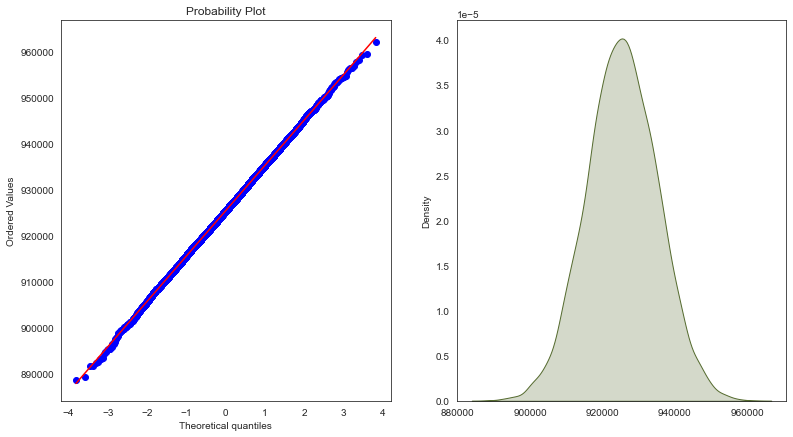

In [145]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(bootstrap_meansmale,dist='norm',plot=ax[0])
sns.kdeplot(bootstrap_meansmale,fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it can infer about the population that, 90% of the times with adequate sample size,
- Average amount spend by male customer will lie in between: (906037.7878625001,942307.3877915)

# Mean, Variance and Standard deviation of Male 

In [146]:
mean=np.mean(bootstrap_meansmale)
Variance=np.var(bootstrap_meansmale)
standard=np.std(bootstrap_meansmale)
print("mean=",mean)
print("Variance=",Variance)
print("standard=",standard)

mean= 925387.18236577
Variance= 97368610.13467984
standard= 9867.553401663446


### Using the central limit theorem of population,
- Average amount spend by male customers is 925387.18236577
- Variance amount spend by male customers is 97368610.13467984
- standard amount spend by male customers is 9867.553401663446

# KDEplot of Male and Female with less sample size

[]

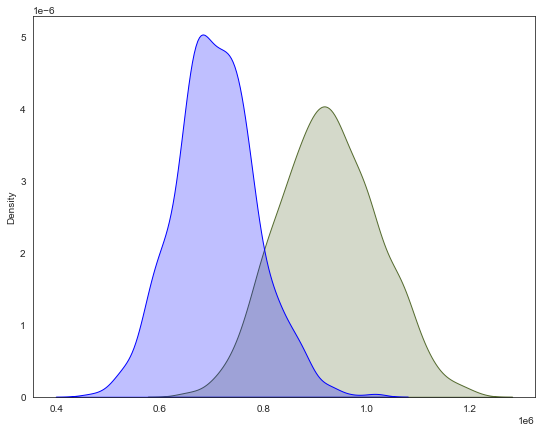

In [147]:
plt.figure(figsize=(9, 7))
sns.kdeplot(bootstrap_meansmaleL,fill=True,color="darkolivegreen")
sns.kdeplot(bootstrap_meansfemaleL,fill=True,color="blue")
plt.plot()

# From the above plot, it describes that,
- The confidence intervals of average male and female spends are overlapping for the lesser sample size.

# KDEplot of Male and Female with adequate sample size

[]

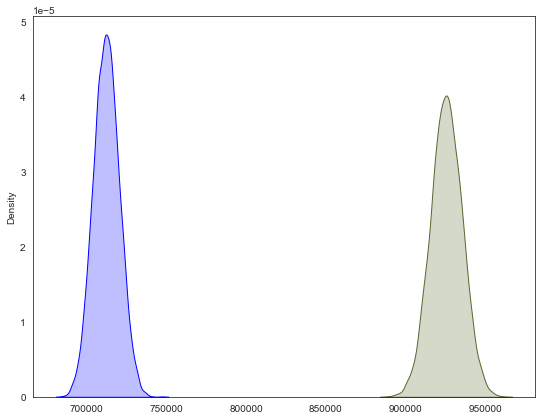

In [148]:
plt.figure(figsize=(9, 7))
sns.kdeplot(bootstrap_meansmale,fill=True,color="darkolivegreen")
sns.kdeplot(bootstrap_meansfemale,fill=True,color="blue")
plt.plot()

### From the above plot, it describes that,
- The confidence intervals of average male and female spends are not overlapping for the adaptive sample size.

# EDA - Bivariate Analysis of Marital_Status

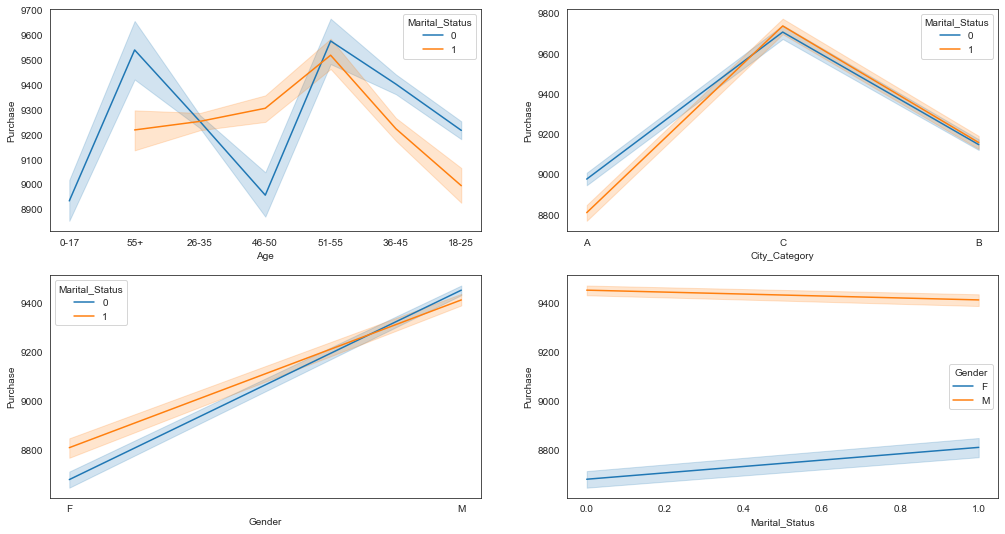

In [149]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(17,9))
sns.lineplot(data=df, x='Age', y='Purchase', hue="Marital_Status",ax=ax[0,0])
sns.lineplot(data=df, x='City_Category', y='Purchase', hue="Marital_Status",ax=ax[0,1])
sns.lineplot(data=df, x='Gender', y='Purchase', hue="Marital_Status",ax=ax[1,0])
sns.lineplot(data=df, x='Marital_Status', y='Purchase', hue="Gender",ax=ax[1,1])
plt.show()

### From the above plot, it is derived that,
- Male customers spend more money than female customers.
- City category C spend more money than others.
- Age category greater than 50 spends more money than others.

# Amount Purchased by Marital_Status

In [150]:
amt_dfmarital = df.groupby(['User_ID','Marital_Status'])[['Purchase']].sum()
amt_dfmarital = amt_dfmarital.reset_index()
amt_dfmarital

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [151]:
amt_dfmarital['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

# Confidence Interval by Marital_Status(Married)

In [152]:
dfmarried=amt_dfmarital[amt_dfmarital["Marital_Status"]==1]
dfmarried

,User_ID,Marital_Status,Purchase
3,1000004,1,206468
4,1000005,1,821001
6,1000007,1,234668
7,1000008,1,796593
9,1000010,1,2169510
...,...,...,...
5879,1006029,1,157436
5880,1006030,1,737361
5883,1006033,1,501843
5886,1006036,1,4116058


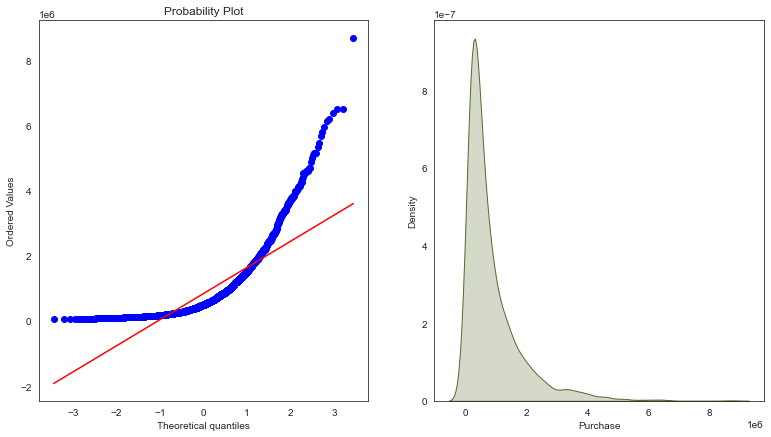

In [153]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(dfmarried["Purchase"],dist='norm',plot=ax[0])
sns.kdeplot(dfmarried["Purchase"],fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it is derived that,
- The above plots doesnt follow the normal distribution.

In [154]:
n_iteration=10000
bootstrap_meansmarried=[]
sample_size=10000
for i in range(n_iteration):
    s=resample(dfmarried['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meansmarried.append(m)
confidence=0.95
lower,upper=np.percentile(bootstrap_meansmarried,[2.5,95.75])
print(lower)
print(upper)

825143.2969525
859391.07106775


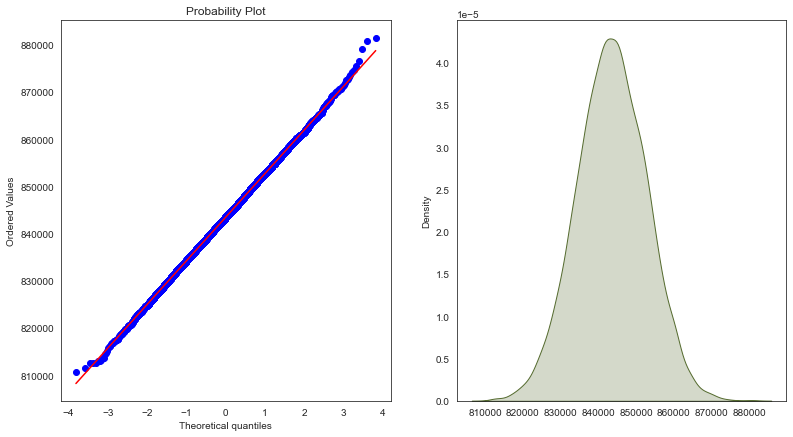

In [155]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(bootstrap_meansmarried,dist='norm',plot=ax[0])
sns.kdeplot(bootstrap_meansmarried,fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it can infer about the population that, 95% of the times,
- Average amount spend by married customer will lie in between: (825143.2969525, 859391.07106775)

# Mean, Variance and Standard deviation of Married customers

In [156]:
mean=np.mean(bootstrap_meansmarried)
Variance=np.var(bootstrap_meansmarried)
standard=np.std(bootstrap_meansmarried)
print("mean=",mean)
print("Variance=",Variance)
print("standard=",standard)

mean= 843486.0843050499
Variance= 85484688.55327927
standard= 9245.79301916711


### Using the central limit theorem of population,
- Average amount spend by married customers is 843486.0843050499
- Variance amount spend by married customers is 85484688.55327927
- standard amount spend by married customers is 9245.79301916711

# Confidence Interval by Marital_Status(UnMarried)

In [157]:
dfunmarried=amt_dfmarital[amt_dfmarital["Marital_Status"]==0]
dfunmarried

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
5,1000006,0,379930
8,1000009,0,594099
...,...,...,...
5884,1006034,0,197086
5885,1006035,0,956645
5887,1006037,0,1119538
5888,1006038,0,90034


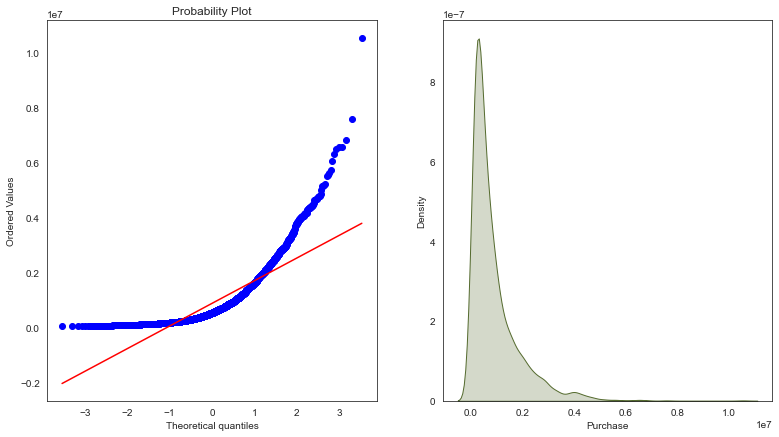

In [158]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(dfunmarried["Purchase"],dist='norm',plot=ax[0])
sns.kdeplot(dfunmarried["Purchase"],fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it is derived that,
- The above plots doesnt follow the normal distribution.

In [159]:
n_iteration=10000
bootstrap_meansunmarried=[]
sample_size=10000
for i in range(n_iteration):
    s=resample(dfunmarried['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meansunmarried.append(m)
confidence=0.95
lower,upper=np.percentile(bootstrap_meansunmarried,[2.5,95.75])
print(lower)
print(upper)

861873.338935
896954.769496


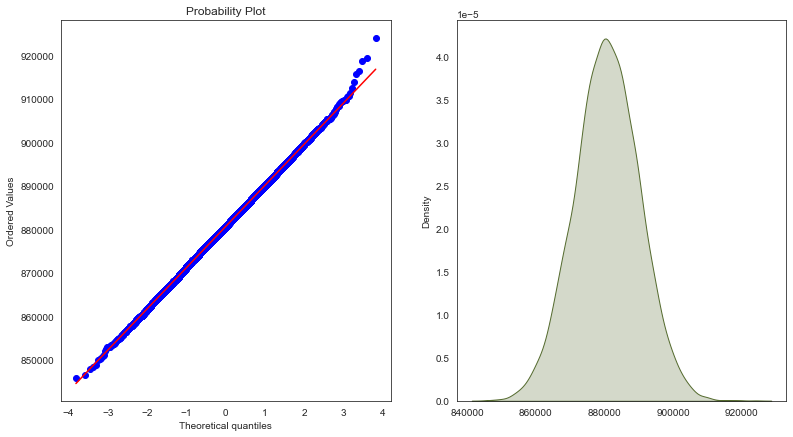

In [160]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(bootstrap_meansunmarried,dist='norm',plot=ax[0])
sns.kdeplot(bootstrap_meansunmarried,fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it can infer about the population that, 95% of the times,
- Average amount spend by unmarried customer will lie in between: (861873.338935, 896954.769496)

# Mean, Variance and Standard deviation of UnMarried customers

In [161]:
mean=np.mean(bootstrap_meansunmarried)
Variance=np.var(bootstrap_meansunmarried)
standard=np.std(bootstrap_meansunmarried)
print("mean=",mean)
print("Variance=",Variance)
print("standard=",standard)

mean= 880656.3453679599
Variance= 89915145.67425564
standard= 9482.359710233293


### Using the central limit theorem of population,
- Average amount spend by unmarried customers is 880656.3453679599
- Variance amount spend by unmarried customers is 89915145.67425564
- standard amount spend by unmarried customers is 9482.359710233293

# Amount Purchased by Age

In [162]:
amt_dfage = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_dfage = amt_dfage.reset_index()
amt_dfage

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [163]:
amt_dfage['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

- Most of the customers are in 26-35 age group

# Confidence Interval by Age(0-17)

In [164]:
dfAge1=amt_dfage[amt_dfage["Age"]=="0-17"]
dfAge1

,User_ID,Age,Purchase
0,1000001,0-17,334093
18,1000019,0-17,1458069
48,1000051,0-17,200772
72,1000075,0-17,1035584
83,1000086,0-17,294063
...,...,...,...
5696,1005844,0-17,476231
5803,1005953,0-17,629161
5823,1005973,0-17,270475
5839,1005989,0-17,466195


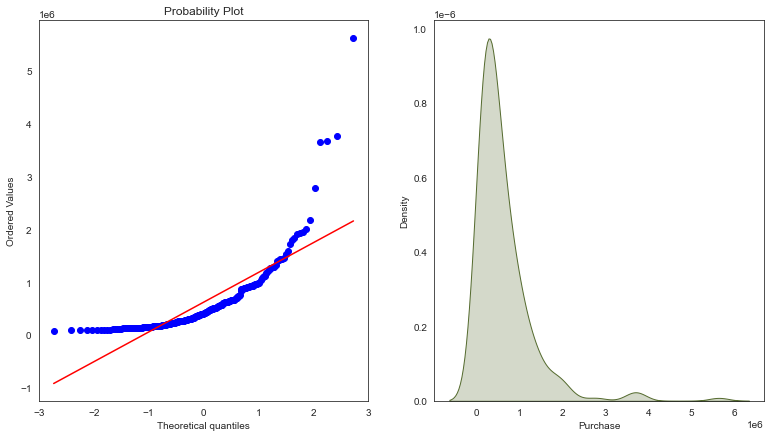

In [165]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(dfAge1["Purchase"],dist='norm',plot=ax[0])
sns.kdeplot(dfAge1["Purchase"],fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it is derived that,
- The above plots doesnt follow the normal distribution.

In [166]:
n_iteration=10000
bootstrap_meansAge1=[]
sample_size=10000
for i in range(n_iteration):
    s=resample(dfAge1['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meansAge1.append(m)
confidence=0.95
lower,upper=np.percentile(bootstrap_meansAge1,[2.5,95.75])
print(lower)
print(upper)

605214.6593675
630883.56152925


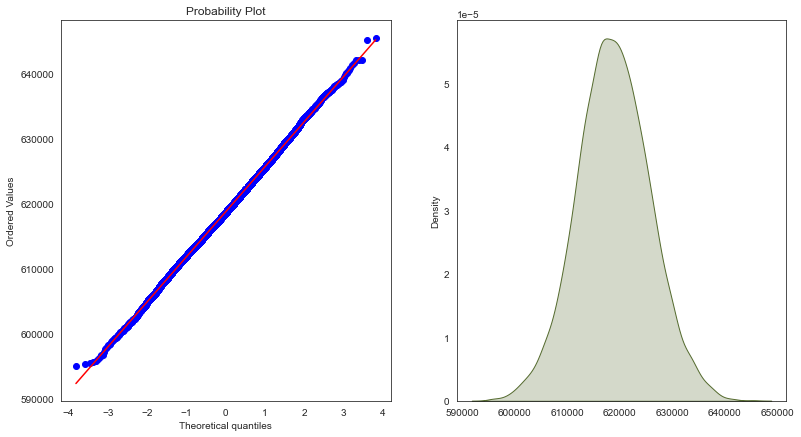

In [167]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(bootstrap_meansAge1,dist='norm',plot=ax[0])
sns.kdeplot(bootstrap_meansAge1,fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it can infer about the population that, 95% of the times,
- Average amount spend by Age 0-17 customer will lie in between: (605214.6593675, 630883.56152925)

# Mean, Variance and Standard deviation of Age 0-17 customers

In [168]:
mean=np.mean(bootstrap_meansAge1)
Variance=np.var(bootstrap_meansAge1)
standard=np.std(bootstrap_meansAge1)
print("mean=",mean)
print("Variance=",Variance)
print("standard=",standard)

mean= 618784.32991209
Variance= 48070618.88334132
standard= 6933.297836047527


### Using the central limit theorem of population,
- Average amount spend by Age 0-17 customers is 618784.32991209
- Variance amount spend by Age 0-17 customers is 48070618.88334132
- standard amount spend by Age 0-17 customers is 6933.297836047527

# Confidence Interval by Age(18-25)

In [169]:
dfAge2=amt_dfage[amt_dfage["Age"]=="18-25"]
dfAge2

,User_ID,Age,Purchase
17,1000018,18-25,1979047
20,1000021,18-25,127099
21,1000022,18-25,1279914
24,1000025,18-25,534706
33,1000034,18-25,807983
...,...,...,...
5848,1005998,18-25,702901
5858,1006008,18-25,266306
5877,1006027,18-25,265201
5878,1006028,18-25,362972


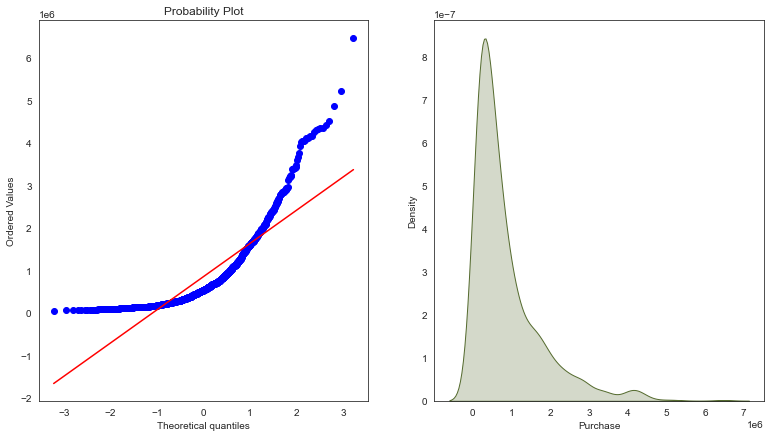

In [170]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(dfAge2["Purchase"],dist='norm',plot=ax[0])
sns.kdeplot(dfAge2["Purchase"],fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it is derived that,
- The above plots doesnt follow the normal distribution.

In [171]:
n_iteration=10000
bootstrap_meansAge2=[]
sample_size=10000
for i in range(n_iteration):
    s=resample(dfAge2['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meansAge2.append(m)
confidence=0.95
lower,upper=np.percentile(bootstrap_meansAge2,[2.5,95.75])
print(lower)
print(upper)

837780.152075
870590.4225105001


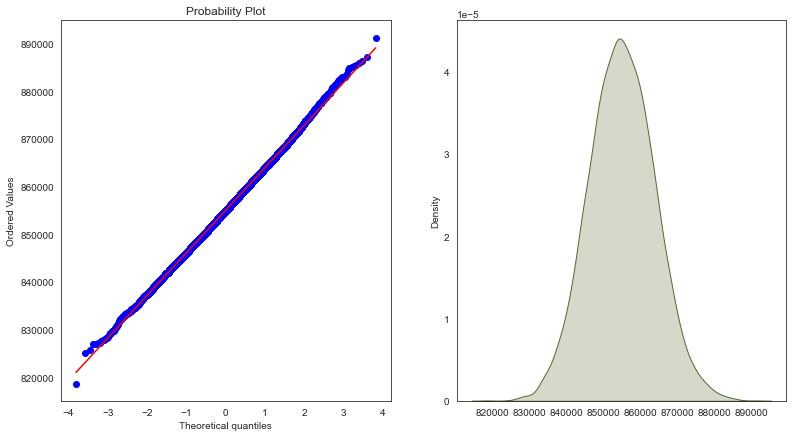

In [172]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(bootstrap_meansAge2,dist='norm',plot=ax[0])
sns.kdeplot(bootstrap_meansAge2,fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it can infer about the population that, 95% of the times,
- Average amount spend by Age 18-25 customer will lie in between: (837780.152075, 870590.4225105001)

# Mean, Variance and Standard deviation of Age 18-25 customers

In [173]:
mean=np.mean(bootstrap_meansAge2)
Variance=np.var(bootstrap_meansAge2)
standard=np.std(bootstrap_meansAge2)
print("mean=",mean)
print("Variance=",Variance)
print("standard=",standard)

mean= 855049.00636266
Variance= 79639304.43948767
standard= 8924.085636046288


### Using the central limit theorem of population,
- Average amount spend by Age 18-25 customers is 855049.00636266
- Variance amount spend by Age 18-25 customers is 79639304.43948767
- standard amount spend by Age 18-25 customers is 8924.085636046288

# Confidence Interval by Age(26-35)

In [174]:
dfAge3=amt_dfage[amt_dfage["Age"]=="26-35"]
dfAge3

,User_ID,Age,Purchase
2,1000003,26-35,341635
4,1000005,26-35,821001
7,1000008,26-35,796593
8,1000009,26-35,594099
10,1000011,26-35,557023
...,...,...,...
5880,1006030,26-35,737361
5884,1006034,26-35,197086
5885,1006035,26-35,956645
5886,1006036,26-35,4116058


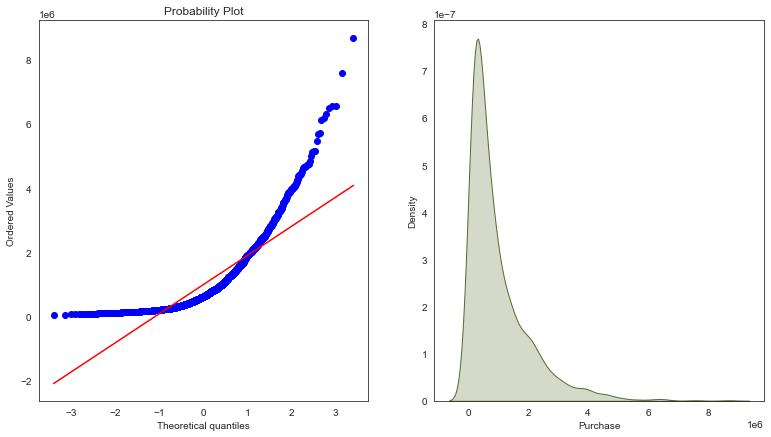

In [175]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(dfAge3["Purchase"],dist='norm',plot=ax[0])
sns.kdeplot(dfAge3["Purchase"],fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it is derived that,
- The above plots doesnt follow the normal distribution.

In [176]:
n_iteration=10000
bootstrap_meansAge3=[]
sample_size=10000
for i in range(n_iteration):
    s=resample(dfAge3['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meansAge3.append(m)
confidence=0.95
lower,upper=np.percentile(bootstrap_meansAge3,[2.5,95.75])
print(lower)
print(upper)

969458.7254875
1007399.46841525


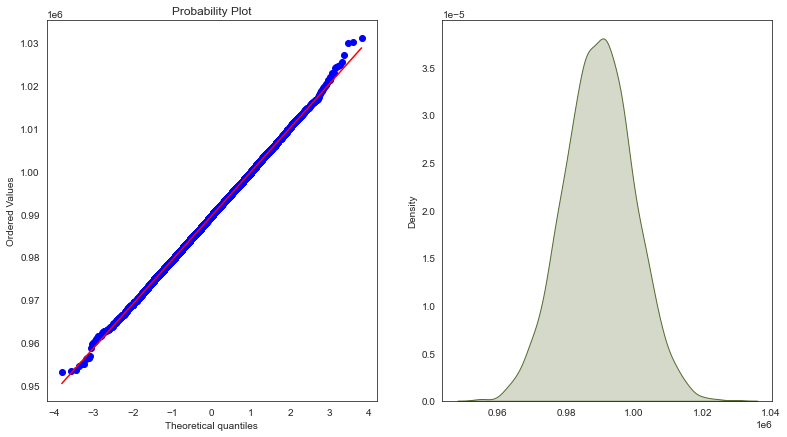

In [177]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(bootstrap_meansAge3,dist='norm',plot=ax[0])
sns.kdeplot(bootstrap_meansAge3,fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it can infer about the population that, 95% of the times,
- Average amount spend by Age 26-35 customer will lie in between: (969458.7254875, 1007399.46841525

# Mean, Variance and Standard deviation of Age 26-35 customers

In [178]:
mean=np.mean(bootstrap_meansAge3)
Variance=np.var(bootstrap_meansAge3)
standard=np.std(bootstrap_meansAge3)
print("mean=",mean)
print("Variance=",Variance)
print("standard=",standard)

mean= 989640.97374291
Variance= 105748014.2011423
standard= 10283.38534730379


### Using the central limit theorem of population,
- Average amount spend by Age 26-35 customers is 989640.97374291
- Variance amount spend by Age 26-35 customers is 105748014.2011423
- standard amount spend by Age 26-35 customers is 10283.38534730379

# Confidence Interval by Age(36-50)

In [179]:
dfAge4=amt_dfage[(amt_dfage["Age"]=="36-45") | (amt_dfage["Age"]=="46-50")]
dfAge4

,User_ID,Age,Purchase
3,1000004,46-50,206468
6,1000007,36-45,234668
9,1000010,36-45,2169510
12,1000013,46-50,713927
13,1000014,36-45,127629
...,...,...,...
5868,1006018,36-45,975585
5876,1006026,36-45,490768
5882,1006032,46-50,517261
5887,1006037,46-50,1119538


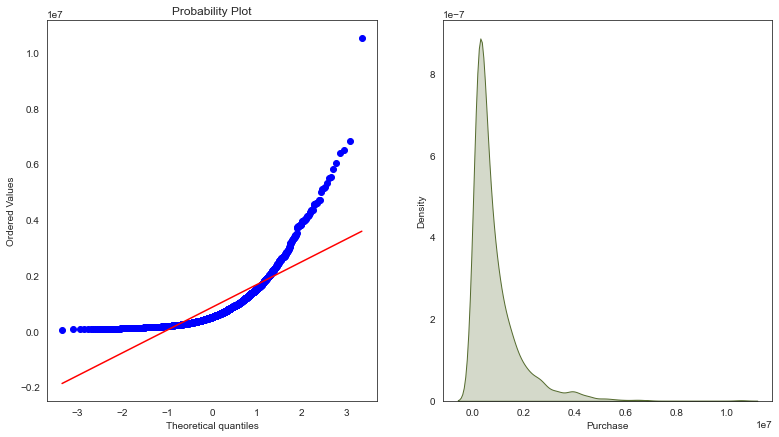

In [180]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(dfAge4["Purchase"],dist='norm',plot=ax[0])
sns.kdeplot(dfAge4["Purchase"],fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it is derived that,
- The above plots doesnt follow the normal distribution.

In [181]:
n_iteration=10000
bootstrap_meansAge4=[]
sample_size=10000
for i in range(n_iteration):
    s=resample(dfAge4['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meansAge4.append(m)
confidence=0.95
lower,upper=np.percentile(bootstrap_meansAge4,[2.5,95.75])
print(lower)
print(upper)

833675.70534
868855.5690222499


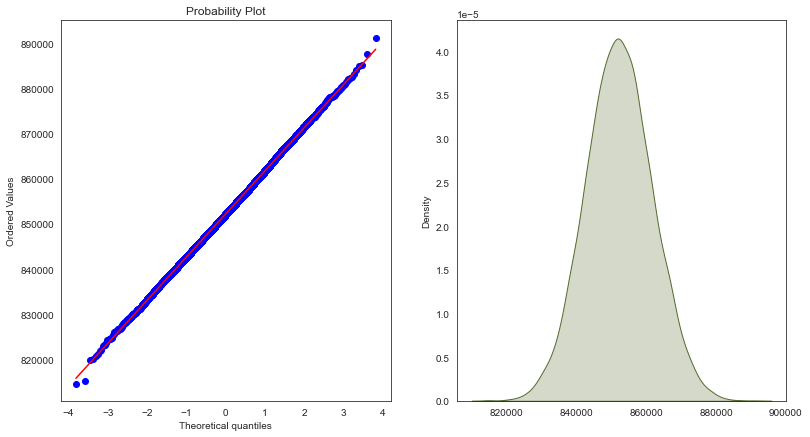

In [182]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(bootstrap_meansAge4,dist='norm',plot=ax[0])
sns.kdeplot(bootstrap_meansAge4,fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it can infer about the population that, 95% of the times,
- Average amount spend by Age 36-50 customer will lie in between: (833675.70534, 868855.5690222499)

# Mean, Variance and Standard deviation of Age 36-50 customers

In [183]:
mean=np.mean(bootstrap_meansAge4)
Variance=np.var(bootstrap_meansAge4)
standard=np.std(bootstrap_meansAge4)
print("mean=",mean)
print("Variance=",Variance)
print("standard=",standard)

mean= 852261.0784268101
Variance= 91376158.45067973
standard= 9559.087741551479


### Using the central limit theorem of population,
- Average amount spend by Age 36-50 customers is 852261.0784268101
- Variance amount spend by Age 36-50 customers is 91376158.45067973
- standard amount spend by Age 36-50 customers is 9559.087741551479

# Confidence Interval by Age(51+)

In [184]:
dfAge6=amt_dfage[(amt_dfage["Age"]=="51-55") | (amt_dfage["Age"]=="55+") ]
dfAge6

,User_ID,Age,Purchase
1,1000002,55+,810472
5,1000006,51-55,379930
16,1000017,51-55,1425995
30,1000031,55+,496154
51,1000054,51-55,187451
...,...,...,...
5843,1005993,51-55,130022
5852,1006002,51-55,1843460
5870,1006020,51-55,374475
5883,1006033,51-55,501843


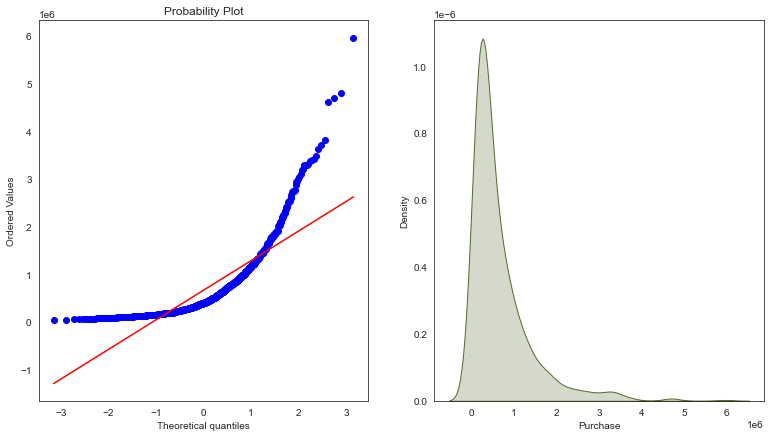

In [185]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(dfAge6["Purchase"],dist='norm',plot=ax[0])
sns.kdeplot(dfAge6["Purchase"],fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it is derived that,
- The above plots doesnt follow the normal distribution.

In [186]:
n_iteration=10000
bootstrap_meansAge6=[]
sample_size=10000
for i in range(n_iteration):
    s=resample(dfAge6['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meansAge6.append(m)
confidence=0.95
lower,upper=np.percentile(bootstrap_meansAge6,[2.5,95.75])
print(lower)
print(upper)

651338.1092599999
678430.44856475


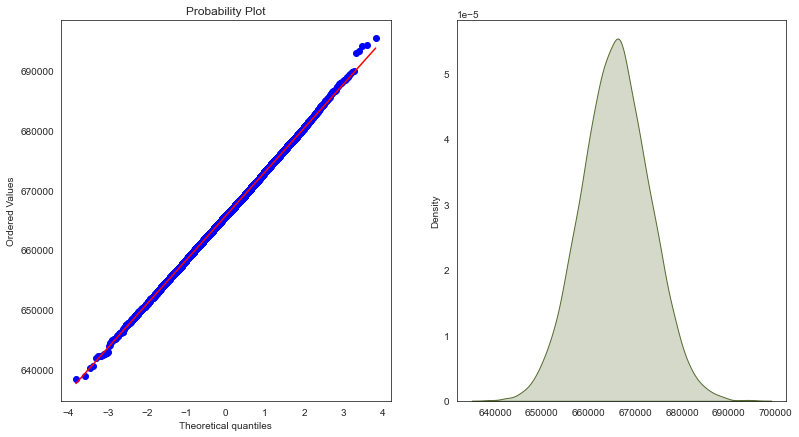

In [187]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
stats.probplot(bootstrap_meansAge6,dist='norm',plot=ax[0])
sns.kdeplot(bootstrap_meansAge6,fill=True,color="darkolivegreen",ax=ax[1])
plt.show()

### From the above plot, it can infer about the population that, 95% of the times,
- Average amount spend by Age 51+ customer will lie in between: (651338.1092599999,678430.44856475)

# Mean, Variance and Standard deviation of Age 51+ customers

In [188]:
mean=np.mean(bootstrap_meansAge6)
Variance=np.var(bootstrap_meansAge6)
standard=np.std(bootstrap_meansAge6)
print("mean=",mean)
print("Variance=",Variance)
print("standard=",standard)

mean= 665736.2978191
Variance= 54332503.287172094
standard= 7371.058491639589


### Using the central limit theorem of population,
- Average amount spend by Age 51+ customers is 665736.2978191
- Variance amount spend by Age 51+ customers is 54332503.287172094
- standard amount spend by Age 51+ customers is 7371.058491639589

,count
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823


# Recommendations

- Men spent more money than women, So company should focus on male customers and getting more male customers.
- Product_Category - 1, 5 and 8 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products.
- Unmarried customers spend more money than married customers, So company should focus on Unmarried customers.
- Occupation 4 and 7 spends more money from all city category, So selling more product in occupation 4 and 7 will help to increase the revenue.
- Customers in the age 18-45 spend more money than the others, So company should focus on customers who are in the age 18-45.
- More no of Customers living in City_Category B, So company should focus category B to buy more products.
- Customers living in City_Category C spend more money than other  customers , Selling more products in the City_Category C will help the company increase the revenue.